In \[ \]:

     

# AI Lab - initial guidelines to generate your reports<a href="#AI-Lab---initial-guidelines-to-generate-your-reports" class="anchor-link">¶</a>

This is a small sample notebook for you with some information that you
might use to generate you reports. It has some guidelines, some initial
ideas, and some questions for you to think about and discuss. This is
only an initial notebook, please organize as you like.

I expect you to grow your notebooks into full project reports, with your
work and results, the description of your steps, justification for your
choices, and your ideas and considerations. Please use both text and
visualisations to clarify results and concepts. Please try also to
capture the discussion we had in class, and the discussion you had
afterwards. The final reports should reflect the work of your group and
your very own results, ideas and discussion.

If you need domain specific knowlegde you can check again some of the
handouts, and you can also explore further some of the links in the
handouts, or you can ask. However, please try not to be too domain
specific in your thinking and in your reports, try to to apply the
theory you have learnt and use your observations and results to extract
general underlying concepts.

For the first AI Lab day we progress all together, and below I give you
some more pointers for the first analysis steps. This is so you can
familizarize with the data. After this, from day 2, you will progress
more independently, and for days 3 and 4 you will divide into groups for
the data challenge.

## Introduction<a href="#Introduction" class="anchor-link">¶</a>

Please include a short introduction based on what we discussed in class:

-   Background
-   Overall Aim
-   Specific Objectives

\[...\]

This should be based on what we discussed in class. Please ask any
questions you have or clarifications, you can also consult the handouts.
I would probably aim for no more than 200 words for this section.

## Materials and Methods<a href="#Materials-and-Methods" class="anchor-link">¶</a>

Please include:

-   A short description of the data and how they were obtained.
-   A short description of the methods you will use and why.

\[...\]

I would aim for no longer than 300 words, but you could also provide
more details and justification of data and methods when you load
them/use them in the following sections.

------------------------------------------------------------------------

------------------------------------------------------------------------

## Python libraries<a href="#Python-libraries" class="anchor-link">¶</a>

In \[1\]:

    #Remember you can use command line mode if installations are needed
    #!pip install numpy==1.19.5
    #!pip install matplotlib
    #!pip install seaborn
    #!pip install pandas
    #[....] for you to add. Please include here for reference the libraries you will use. 

In \[2\]:

    import sys
    import sklearn
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt             #visualisation
    import seaborn as sns   #visualisation
    %matplotlib inline     
    sns.set(color_codes=True)
    #[....] for you to add

------------------------------------------------------------------------

## Exploratory data analysis<a href="#Exploratory-data-analysis" class="anchor-link">¶</a>

First we load the data. There are four datasets. They correspond to four
different experiments in two different cell lines, and using two
different single cell RNA sequencing techniques. You might proceed one
experiment at a time, or download the metadata for all experiments and
discuss them together. Here I show the example for one of the datasets.

### MCF7 SmartSeq experiment<a href="#MCF7-SmartSeq-experiment" class="anchor-link">¶</a>

First we read in the metadata. There are 4 metadata files. One for each
experiment. They are tab delimited file TSV.

In \[3\]:

    # Remember to change the path. This should point to where you have stored the metadata files. 
    df_meta = pd.read_csv("SmartSeq/MCF7_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
    print("Dataframe dimensions:", np.shape(df_meta))
    print("First column: ", df_meta.iloc[ : , 0])

    Dataframe dimensions: (383, 8)
    First column:  Filename
    output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    MCF7
    output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam    MCF7
    output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    MCF7
    output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam      MCF7
    output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      MCF7
                                                                ... 
    output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    MCF7
    output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    MCF7
    output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    MCF7
    output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    MCF7
    output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    MCF7
    Name: Cell Line, Length: 383, dtype: object

In \[4\]:

    df_meta.head(5)   

Out\[4\]:

|                                                          | Cell Line | PCR Plate | Pos | Condition | Hours | Cell name | PreprocessingTag              | ProcessingComments |
|----------------------------------------------------------|-----------|-----------|-----|-----------|-------|-----------|-------------------------------|--------------------|
| Filename                                                 |           |           |     |           |       |           |                               |                    |
| output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam | MCF7      | 1         | A10 | Hypo      | 72    | S28       | Aligned.sortedByCoord.out.bam | STAR,FeatureCounts |
| output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam | MCF7      | 1         | A11 | Hypo      | 72    | S29       | Aligned.sortedByCoord.out.bam | STAR,FeatureCounts |
| output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam | MCF7      | 1         | A12 | Hypo      | 72    | S30       | Aligned.sortedByCoord.out.bam | STAR,FeatureCounts |
| output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam   | MCF7      | 1         | A1  | Norm      | 72    | S1        | Aligned.sortedByCoord.out.bam | STAR,FeatureCounts |
| output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam   | MCF7      | 1         | A2  | Norm      | 72    | S2        | Aligned.sortedByCoord.out.bam | STAR,FeatureCounts |

You comments

-   what are the raws?
-   what are the columns?

\[....\]

Next we download the actual sequencing data. In this case the datasets
are space-delimited. The name of the file gives you information on cell
line, the technology used and processing. The format is:
CellLine_Technology_preprocessing_Data.txt

You can download all data files, and then discuss them together later,
or proceed one data file at the time.

In \[5\]:

    # Remember to change the path. This should point to where you have stored the data files. 
    df = pd.read_csv("SmartSeq/MCF7_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0)
    print("Dataframe dimensions:", np.shape(df))
    print("First column: ", df.iloc[ : , 0])

    Dataframe dimensions: (22934, 383)
    First column:  "WASH7P"         0
    "MIR6859-1"      0
    "WASH9P"         1
    "OR4F29"         0
    "MTND1P23"       0
                  ... 
    "MT-TE"          4
    "MT-CYB"       270
    "MT-TT"          0
    "MT-TP"          5
    "MAFIP"          8
    Name: "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam", Length: 22934, dtype: int64

For each data file, describe its structure and content.

-   File dimensions
-   Raws/columns are
-   This dataframe uses Symbols to identify genes (e.g. You can add the
    discussion we had in class on identifiers) \[...\]

In \[6\]:

    df.shape

Out\[6\]:

    (22934, 383)

In \[7\]:

    list(df.columns)

Out\[7\]:

    ['"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_A9_Hypo_S27_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_B11_Hypo_S77_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_B12_Hypo_S78_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_B1_Norm_S49_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_B2_Norm_S50_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_B3_Norm_S51_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_B4_Norm_S52_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_B5_Norm_S53_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_B6_Norm_S54_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_B7_Hypo_S73_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_B8_Hypo_S74_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_B9_Hypo_S75_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_C10_Hypo_S124_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_C11_Hypo_S125_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_C12_Hypo_S126_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_C1_Norm_S97_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_C2_Norm_S98_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_C3_Norm_S99_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_C4_Norm_S100_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_C5_Norm_S101_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_C6_Norm_S102_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_C7_Hypo_S121_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_C8_Hypo_S122_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_C9_Hypo_S123_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_D10_Hypo_S172_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_D11_Hypo_S173_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_D12_Hypo_S174_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_D1_Norm_S145_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_D2_Norm_S146_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_D3_Norm_S147_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_D4_Norm_S148_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_D5_Norm_S149_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_D6_Norm_S150_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_D7_Hypo_S169_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_D8_Hypo_S170_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_D9_Hypo_S171_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_E10_Hypo_S220_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_E11_Hypo_S221_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_E12_Hypo_S222_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_E1_Norm_S193_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_E2_Norm_S194_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_E3_Norm_S195_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_E4_Norm_S196_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_E5_Norm_S197_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_E6_Norm_S198_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_E7_Hypo_S217_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_E8_Hypo_S218_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_E9_Hypo_S219_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_F10_Hypo_S268_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_F11_Hypo_S269_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_F12_Hypo_S270_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_F1_Norm_S241_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_F2_Norm_S242_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_F3_Norm_S243_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_F4_Norm_S244_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_F5_Norm_S245_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_F6_Norm_S246_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_F7_Hypo_S265_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_F8_Hypo_S266_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_F9_Hypo_S267_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_G10_Hypo_S316_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_G11_Hypo_S317_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_G12_Hypo_S318_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_G1_Norm_S289_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_G2_Norm_S290_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_G3_Norm_S291_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_G4_Norm_S292_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_G5_Norm_S293_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_G6_Norm_S294_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_G7_Hypo_S313_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_G8_Hypo_S314_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_G9_Hypo_S315_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_H10_Hypo_S364_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_H11_Hypo_S365_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_H12_Hypo_S366_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_H1_Norm_S337_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_H2_Norm_S338_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_H3_Norm_S339_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_H4_Norm_S340_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_H5_Norm_S341_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_H6_Norm_S342_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_H7_Hypo_S361_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_H8_Hypo_S362_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.1_H9_Hypo_S363_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_A10_Hypo_S34_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_A11_Hypo_S35_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_A12_Hypo_S36_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_A1_Norm_S7_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_A2_Norm_S8_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_A3_Norm_S9_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_A4_Norm_S10_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_A5_Norm_S11_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_A6_Norm_S12_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_A7_Hypo_S31_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_A8_Hypo_S32_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_A9_Hypo_S33_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_B10_Hypo_S82_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_B11_Hypo_S83_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_B12_Hypo_S84_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_B1_Norm_S55_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_B2_Norm_S56_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_B8_Hypo_S80_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_C10_Hypo_S130_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_C11_Hypo_S131_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_C12_Hypo_S132_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_C1_Norm_S103_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_C2_Norm_S104_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_C3_Norm_S105_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_C4_Norm_S106_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_C5_Norm_S107_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_C6_Norm_S108_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_C7_Hypo_S127_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_C8_Hypo_S128_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_C9_Hypo_S129_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_D10_Hypo_S178_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_D11_Hypo_S179_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_D12_Hypo_S180_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_D1_Norm_S151_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_D2_Norm_S152_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_D3_Norm_S153_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_D4_Norm_S154_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_D5_Norm_S155_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_D6_Norm_S156_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_D7_Hypo_S175_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_D8_Hypo_S176_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_D9_Hypo_S177_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_E10_Hypo_S226_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_E11_Hypo_S227_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_E12_Hypo_S228_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_E1_Norm_S199_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_E2_Norm_S200_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_E3_Norm_S201_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_E4_Norm_S202_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_E5_Norm_S203_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_E6_Norm_S204_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_E7_Hypo_S223_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_E8_Hypo_S224_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_E9_Hypo_S225_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_F10_Hypo_S274_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_F11_Hypo_S275_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_F12_Hypo_S276_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_F1_Norm_S247_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_F2_Norm_S248_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_F3_Norm_S249_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_F4_Norm_S250_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_F5_Norm_S251_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_F6_Norm_S252_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_F7_Hypo_S271_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_F8_Hypo_S272_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_F9_Hypo_S273_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_G10_Hypo_S322_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_G11_Hypo_S323_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_G12_Hypo_S324_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_G1_Norm_S295_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_G2_Norm_S296_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_G3_Norm_S297_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_G4_Norm_S298_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_G5_Norm_S299_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_G6_Norm_S300_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_G7_Hypo_S319_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_G8_Hypo_S320_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_G9_Hypo_S321_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_H10_Hypo_S370_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_H11_Hypo_S371_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_H12_Hypo_S372_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_H1_Norm_S343_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_H2_Norm_S344_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_H3_Norm_S345_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_H4_Norm_S346_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_H5_Norm_S347_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_H6_Norm_S348_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_H7_Hypo_S367_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_H8_Hypo_S368_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.2_H9_Hypo_S369_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_A10_Hypo_S40_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_A11_Hypo_S41_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_A12_Hypo_S42_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_A1_Norm_S13_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_A2_Norm_S14_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_A3_Norm_S15_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_A4_Norm_S16_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_A5_Norm_S17_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_A6_Norm_S18_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_A7_Hypo_S37_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_A8_Hypo_S38_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_A9_Hypo_S39_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_B10_Hypo_S88_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_B11_Hypo_S89_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_B12_Hypo_S90_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_B1_Norm_S61_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_B2_Norm_S62_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_B3_Norm_S63_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_B4_Norm_S64_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_B5_Norm_S65_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_B6_Norm_S66_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_B7_Hypo_S85_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_B8_Hypo_S86_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_B9_Hypo_S87_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_C10_Hypo_S136_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_C11_Hypo_S137_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_C12_Hypo_S138_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_C1_Norm_S109_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_C2_Norm_S110_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_C3_Norm_S111_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_C4_Norm_S112_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_C5_Norm_S113_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_C6_Norm_S114_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_C7_Hypo_S133_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_C8_Hypo_S134_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_C9_Hypo_S135_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_D10_Hypo_S184_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_D11_Hypo_S185_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_D12_Hypo_S186_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_D1_Norm_S157_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_D2_Norm_S158_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_D3_Norm_S159_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_D4_Norm_S160_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_D5_Norm_S161_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_D6_Norm_S162_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_D7_Hypo_S181_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_D8_Hypo_S182_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_D9_Hypo_S183_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_E10_Hypo_S232_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_E11_Hypo_S233_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_E12_Hypo_S234_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_E1_Norm_S205_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_E2_Norm_S206_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_E3_Norm_S207_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_E4_Norm_S208_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_E5_Norm_S209_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_E6_Norm_S210_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_E7_Hypo_S229_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_E8_Hypo_S230_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_E9_Hypo_S231_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_F10_Hypo_S280_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_F11_Hypo_S281_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_F12_Hypo_S282_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_F1_Norm_S253_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_F2_Norm_S254_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_F3_Norm_S255_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_F4_Norm_S256_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_F5_Norm_S257_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_F6_Norm_S258_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_F7_Hypo_S277_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_F8_Hypo_S278_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_F9_Hypo_S279_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_G10_Hypo_S328_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_G11_Hypo_S329_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_G12_Hypo_S330_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_G1_Norm_S301_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_G2_Norm_S302_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_G3_Norm_S303_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_G4_Norm_S304_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_G5_Norm_S305_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_G6_Norm_S306_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_G7_Hypo_S325_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_G8_Hypo_S326_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_G9_Hypo_S327_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_H10_Hypo_S376_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_H12_Hypo_S378_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_H13_Hypo_S377_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_H1_Norm_S349_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_H2_Norm_S350_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_H3_Norm_S351_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_H4_Norm_S352_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_H5_Norm_S353_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_H6_Norm_S354_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_H7_Hypo_S373_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_H8_Hypo_S374_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.3_H9_Hypo_S375_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_A10_Hypo_S46_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_A11_Hypo_S47_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_A12_Hypo_S48_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_A1_Norm_S19_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_A2_Norm_S20_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_A3_Norm_S21_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_A4_Norm_S22_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_A5_Norm_S23_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_A6_Norm_S24_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_A7_Hypo_S43_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_A8_Hypo_S44_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_A9_Hypo_S45_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_B10_Hypo_S94_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_B11_Hypo_S95_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_B12_Hypo_S96_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_B1_Norm_S67_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_B2_Norm_S68_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_B3_Norm_S69_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_B4_Norm_S70_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_B5_Norm_S71_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_B6_Norm_S72_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_B7_Hypo_S91_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_B8_Hypo_S92_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_B9_Hypo_S93_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_C10_Hypo_S142_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_C11_Hypo_S143_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_C12_Hypo_S144_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_C1_Norm_S115_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_C2_Norm_S116_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_C3_Norm_S117_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_C4_Norm_S118_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_C5_Norm_S119_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_C6_Norm_S120_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_C7_Hypo_S139_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_C8_Hypo_S140_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_C9_Hypo_S141_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_D10_Hypo_S190_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_D11_Hypo_S191_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_D12_Hypo_S192_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_D1_Norm_S163_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_D2_Norm_S164_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_D3_Norm_S165_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_D4_Norm_S166_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_D5_Norm_S167_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_D6_Norm_S168_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_D7_Hypo_S187_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_D8_Hypo_S188_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_D9_Hypo_S189_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_E10_Hypo_S238_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_E11_Hypo_S239_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_E12_Hypo_S240_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_E1_Norm_S211_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_E2_Norm_S212_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_E3_Norm_S213_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_E4_Norm_S214_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_E5_Norm_S215_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_E6_Norm_S216_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_E7_Hypo_S235_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_E8_Hypo_S236_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_E9_Hypo_S237_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_F10_Hypo_S286_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_F11_Hypo_S287_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_F12_Hypo_S288_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_F1_Norm_S259_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_F2_Norm_S260_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_F3_Norm_S261_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_F4_Norm_S262_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_F5_Norm_S263_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_F6_Norm_S264_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_F7_Hypo_S283_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_F8_Hypo_S284_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_F9_Hypo_S285_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_G10_Hypo_S334_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_G11_Hypo_S335_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_G12_Hypo_S336_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_G1_Norm_S307_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_G2_Norm_S308_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_G3_Norm_S309_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_G4_Norm_S310_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_G5_Norm_S311_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_G6_Norm_S312_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_G7_Hypo_S331_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_G8_Hypo_S332_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_G9_Hypo_S333_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_H10_Hypo_S382_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"',
     '"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"']

In \[8\]:

    gene_symbls = df.index
    print("Dataframe indexes: ", gene_symbls)

    Dataframe indexes:  Index(['"WASH7P"', '"MIR6859-1"', '"WASH9P"', '"OR4F29"', '"MTND1P23"',
           '"MTND2P28"', '"MTCO1P12"', '"MTCO2P12"', '"MTATP8P1"', '"MTATP6P1"',
           ...
           '"MT-TH"', '"MT-TS2"', '"MT-TL2"', '"MT-ND5"', '"MT-ND6"', '"MT-TE"',
           '"MT-CYB"', '"MT-TT"', '"MT-TP"', '"MAFIP"'],
          dtype='object', length=22934)

------------------------------------------------------------------------

***Exploratory data analysis*** include a broad range of possible tasks:

-   check how large are the files
-   are the data types all numeric
-   what can you observe by looking at the data (maybe use some plots to
    explain)

In \[9\]:

    np.shape(df)

Out\[9\]:

    (22934, 383)

In \[10\]:

    df.head(5)

Out\[10\]:

|             | "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam" | ... | "output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam" |
|-------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|-----------------------------------------------------------|-----|-------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|
| "WASH7P"    | 0                                                          | 0                                                          | 0                                                          | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                         | ... | 0                                                           | 0                                                          | 0                                                          | 1                                                          | 0                                                          | 0                                                          | 0                                                          | 1                                                          | 0                                                          | 1                                                          |
| "MIR6859-1" | 0                                                          | 0                                                          | 0                                                          | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                         | ... | 0                                                           | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          |
| "WASH9P"    | 1                                                          | 0                                                          | 0                                                          | 0                                                        | 0                                                        | 1                                                        | 10                                                       | 1                                                        | 0                                                        | 0                                                         | ... | 1                                                           | 1                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 1                                                          | 1                                                          | 4                                                          | 5                                                          |
| "OR4F29"    | 0                                                          | 0                                                          | 0                                                          | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                         | ... | 0                                                           | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 1                                                          | 0                                                          |
| "MTND1P23"  | 0                                                          | 0                                                          | 0                                                          | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                         | ... | 0                                                           | 0                                                          | 1                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          |

5 rows × 383 columns

In \[11\]:

    df.dtypes

Out\[11\]:

    "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    int64
    "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"    int64
    "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"    int64
    "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"      int64
    "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"      int64
                                                                  ...  
    "output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    int64
    "output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    int64
    "output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    int64
    "output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    int64
    "output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    int64
    Length: 383, dtype: object

In \[12\]:

    # you can go from data frame to matrix if you prefer
    X= df.to_numpy()
    X
    np.shape(X)
    #note this might need to be transposed later on in the analysis

Out\[12\]:

    (22934, 383)

The aim is to understand the data by summarizing their main
characteristics (e.g. tables with statistics or visually). This step is
the very first one when we analyse the data. It can be time consuming
but it is very useful to understand the data, perform some quality
control, and define the downstream analysis.

Of note, there are ways of carrying out EDA and some steps that are
domain specific, and even in the same domain sometimes there are
different ways of carrying out EDA. It might depends on the specific
technology or the specific question. However, most of the concepts are
general and applicable to many contexts. The focus should be on the
general context.

You have an **"unfiltered"** data file. These are data are matrixes of
counts, no filter was applied and no normalization was applied. It is a
good idea to start to explore this first to understand the issues with
the dataset and discuss them, and what are the general implications of
the issues you encounter.

You have also **"filtered"** data and **"normalized"** data. These have
been pre-processed for you so eliminate some of the issues. You can use
these to train your classifiers.

***Are there missing values in the data?***

This is a recurring issues in many dataset, including in health. If
there were missing data you could remove them, or try some missing data
imputation.

In \[13\]:

    print(df.isnull().sum())

    "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    0
    "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"    0
    "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"    0
    "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"      0
    "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"      0
                                                                 ..
    "output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    0
    "output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    0
    "output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    0
    "output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    0
    "output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    0
    Length: 383, dtype: int64

In \[33\]:

    #df = df.dropna()    # Dropping the missing values.
    #df.count()

In \[34\]:

    #print(df.isnull().sum())   # After dropping the values

Other general questions you might like to ask yourself in EDA are:

-   ***are there some outliers in the features?***
-   ***are there outliers in the cases?***
-   ***are the data normalized?***

Below some first step, for you to continue and expand, or there might be
other things you like to check.

In \[14\]:

    # you can check specific raws and columns in your data
    df.iloc[ 1:5 , 1:5 ]

Out\[14\]:

|             | "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam" |
|-------------|------------------------------------------------------------|------------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|
| "MIR6859-1" | 0                                                          | 0                                                          | 0                                                        | 0                                                        |
| "WASH9P"    | 0                                                          | 0                                                          | 0                                                        | 0                                                        |
| "OR4F29"    | 0                                                          | 0                                                          | 0                                                        | 0                                                        |
| "MTND1P23"  | 0                                                          | 0                                                          | 0                                                        | 0                                                        |

You can look as some descriptive statistics, for the features (the
genes) or for the cases (the single cells). Below is the example of the
cells. I show mean expression, standard deviation, and other statistics
for the expression of the genes in each cell. You can also look at the
expression of each gene across cells.

In \[15\]:

    df.describe()

Out\[15\]:

|       | "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam" | ... | "output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam" |
|-------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|-----------------------------------------------------------|-----|-------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|
| count | 22934.000000                                               | 22934.000000                                               | 22934.000000                                               | 22934.000000                                             | 22934.000000                                             | 22934.000000                                             | 22934.000000                                             | 22934.000000                                             | 22934.000000                                             | 22934.000000                                              | ... | 22934.000000                                                | 22934.000000                                               | 22934.000000                                               | 22934.000000                                               | 22934.000000                                               | 22934.000000                                               | 22934.000000                                               | 22934.000000                                               | 22934.000000                                               | 22934.000000                                               |
| mean  | 40.817651                                                  | 0.012253                                                   | 86.442400                                                  | 1.024636                                                 | 14.531351                                                | 56.213613                                                | 75.397183                                                | 62.767725                                                | 67.396747                                                | 2.240734                                                  | ... | 17.362562                                                   | 42.080230                                                  | 34.692422                                                  | 32.735284                                                  | 21.992718                                                  | 17.439391                                                  | 49.242784                                                  | 61.545609                                                  | 68.289352                                                  | 62.851400                                                  |
| std   | 465.709940                                                 | 0.207726                                                   | 1036.572689                                                | 6.097362                                                 | 123.800530                                               | 503.599145                                               | 430.471519                                               | 520.167576                                               | 459.689019                                               | 25.449630                                                 | ... | 193.153757                                                  | 256.775704                                                 | 679.960908                                                 | 300.291051                                                 | 153.441647                                                 | 198.179666                                                 | 359.337479                                                 | 540.847355                                                 | 636.892085                                                 | 785.670341                                                 |
| min   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                 | 0.000000                                                 | 0.000000                                                 | 0.000000                                                 | 0.000000                                                 | 0.000000                                                 | 0.000000                                                  | ... | 0.000000                                                    | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   |
| 25%   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                 | 0.000000                                                 | 0.000000                                                 | 0.000000                                                 | 0.000000                                                 | 0.000000                                                 | 0.000000                                                  | ... | 0.000000                                                    | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   |
| 50%   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                 | 0.000000                                                 | 0.000000                                                 | 0.000000                                                 | 1.000000                                                 | 0.000000                                                 | 0.000000                                                  | ... | 0.000000                                                    | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   | 0.000000                                                   |
| 75%   | 17.000000                                                  | 0.000000                                                   | 5.000000                                                   | 0.000000                                                 | 7.000000                                                 | 23.000000                                                | 39.000000                                                | 35.000000                                                | 38.000000                                                | 1.000000                                                  | ... | 9.000000                                                    | 30.000000                                                  | 0.000000                                                   | 17.000000                                                  | 12.000000                                                  | 9.000000                                                   | 27.000000                                                  | 30.000000                                                  | 38.000000                                                  | 33.000000                                                  |
| max   | 46744.000000                                               | 14.000000                                                  | 82047.000000                                               | 289.000000                                               | 10582.000000                                             | 46856.000000                                             | 29534.000000                                             | 50972.000000                                             | 36236.000000                                             | 1707.000000                                               | ... | 17800.000000                                                | 23355.000000                                               | 81952.000000                                               | 29540.000000                                               | 12149.000000                                               | 19285.000000                                               | 28021.000000                                               | 40708.000000                                               | 46261.000000                                               | 68790.000000                                               |

8 rows × 383 columns

You can plot the values for some features or for some cases

In \[16\]:

    cnames = list(df.columns)
    cnames[1]
    sns.boxplot(x=df[cnames[1]])

Out\[16\]:

    <AxesSubplot:xlabel='"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"'>

![](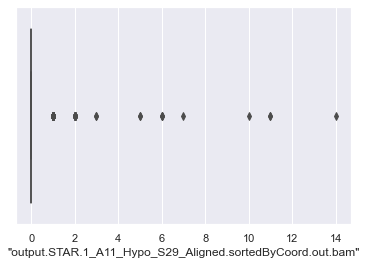%0A)

In \[17\]:

    # Violin plots can be usefull. They are similar to a box plot, with the addition of a rotated kernel density plot on each side. So you can see the probability density of the data at different values. 
    sns.violinplot(x=df[cnames[1]])

Out\[17\]:

    <AxesSubplot:xlabel='"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"'>

![](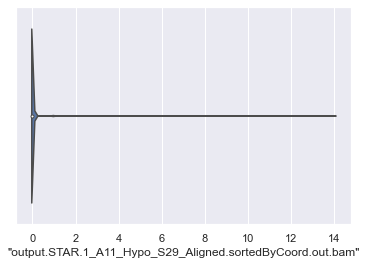%0A)

You can plot the distrubtion of the data for each sample, or viceversa.
Below I'm plotting the violin plots of the features' values (the gene
expression) for the first 50 samples (our single cells). Each violin
plot corresponds to a single cell.

In \[20\]:

    df_small = df.iloc[:, :50]
    np.shape(df_small)
    plt.figure(figsize=(16,4))
    plot=sns.violinplot(data=df_small,palette="Set3",cut=0)
    plt.setp(plot.get_xticklabels(), rotation=90)

Out\[20\]:

    [None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None]

![](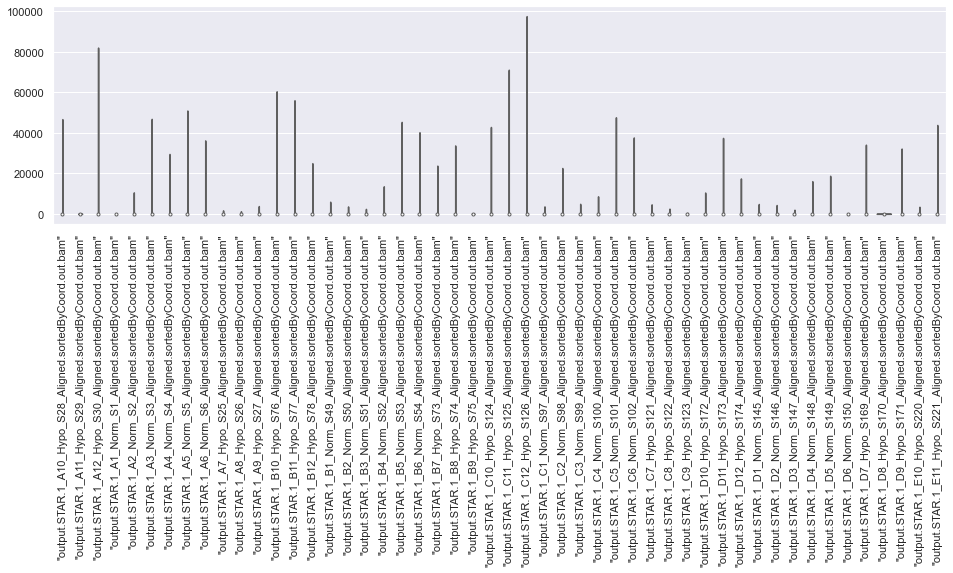%0A)

------------------------------------------------------------------------

Let's look for ***outliers***. A standard appraoch with outliers is to
compute the inter quantile range, and use this to define outliers and
filter them as below.

In \[21\]:

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)

    "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    17.0
    "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"     0.0
    "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"     5.0
    "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"       0.0
    "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"       7.0
                                                                  ... 
    "output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"     9.0
    "output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    27.0
    "output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    30.0
    "output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    38.0
    "output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    33.0
    Length: 383, dtype: float64

Let's try to eliminate outliers using the quantile range.

PS. Create a new dataset. It is always tidier in EDA. You can eliminate
the old one later if you are happy with your new filtered or transformed
dataset.

In \[22\]:

    df_noOut = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    df_noOut.shape
    df_noOut.head(3)

Out\[22\]:

|             | "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam" | "output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam" | ... | "output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam" | "output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam" |
|-------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|-----------------------------------------------------------|-----|-------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|
| "MIR6859-1" | 0                                                          | 0                                                          | 0                                                          | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                         | ... | 0                                                           | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          |
| "CICP3"     | 0                                                          | 0                                                          | 0                                                          | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                         | ... | 0                                                           | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          |
| "FAM87B"    | 0                                                          | 0                                                          | 0                                                          | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 0                                                        | 2                                                        | 0                                                         | ... | 0                                                           | 1                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          | 0                                                          |

3 rows × 383 columns

Let's look at our violin plots again, for the dataset with outliers
removed:

In \[23\]:

    sns.boxplot(x=df_noOut[cnames[1]])

Out\[23\]:

    <AxesSubplot:xlabel='"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"'>

![](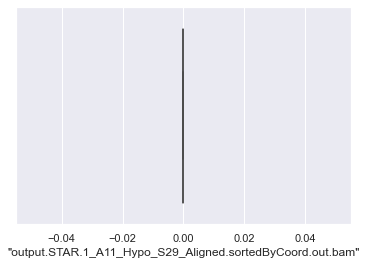%0A)

In \[24\]:

    df_noOut_small = df.iloc[:, :50]
    np.shape(df_noOut_small)
    plt.figure(figsize=(16,4))
    plot=sns.violinplot(data=df_noOut_small,palette="Set3",cut=0)
    plt.setp(plot.get_xticklabels(), rotation=90)

Out\[24\]:

    [None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None]

![](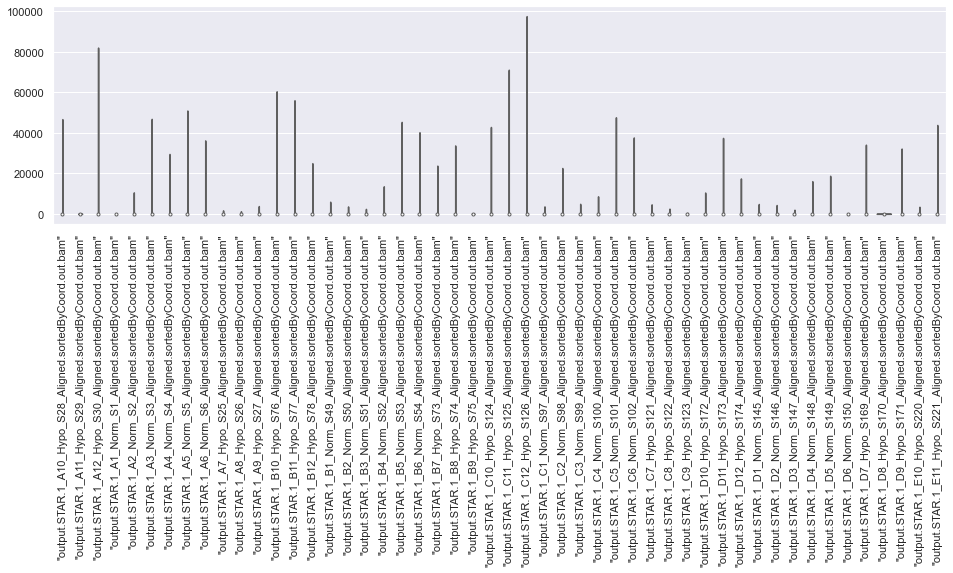%0A)

They don't look good. We have just zeros now. Simply removing outliers
would not work here, as many genes/features would simply be 0 if we
excluded the outliers. So we need to proceed differently, as *the
outliers seem to be the values carrying the information in this case*.

In fact you might have observed that ***the data are sparse***.

Features with sparse data are features that have mostly zero values. For
example, a sensor connected with a door will send a signal only when
there is a movement of the door. The seonsor recording will have mostly
zero values, because the door is not always moving. The rare non-zero
values will be the valuable information: somebody is entering the room.
Large sparse matrices are common, and encountered often in applied
machine learning tasks. Examples of sparse data include data encodings
that map categories to counts, vectors of one-hot-encoded words or
counts of categorical data. On the other hand, features with dense data
have predominantly non-zero values.

-   ***can you quantify the sparsity?***
-   ***would using sparse matrix representation be an advantage?***
-   ***what would you do to adress this sparsity?***

------------------------------------------------------------------------

You can also inspect summary statistics of the ***distribution*** of
your data. For example you can look at Skewness and Kurtosis of the gene
expression profiles.

In \[25\]:

    from scipy.stats import kurtosis, skew
    colN = np.shape(df)[1]
    colN
    df_skew_cells = []
    for i in range(colN) :     
         v_df = df[cnames[i]]
         df_skew_cells += [skew(v_df)]   
      #  df_skew_cells += [df[cnames[i]].skew()]
    df_skew_cells
    sns.histplot(df_skew_cells,bins=100)
    plt.xlabel('Skewness of single cells expression profiles - original df')

Out\[25\]:

    Text(0.5, 0, 'Skewness of single cells expression profiles - original df')

![](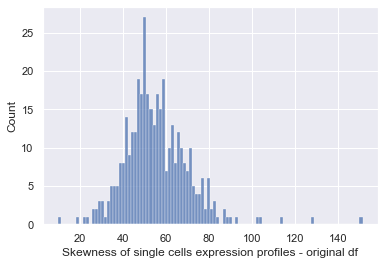%0A)

In \[26\]:

    df_kurt_cells = []
    for i in range(colN) :     
         v_df = df[cnames[i]]
         df_kurt_cells += [kurtosis(v_df)]   
     #   df_kurt_cells += [df[cnames[i]].kurt()]
    df_kurt_cells
    sns.histplot(df_kurt_cells,bins=100)
    plt.xlabel('Kurtosis of single cells expression profiles - original df')

Out\[26\]:

    Text(0.5, 0, 'Kurtosis of single cells expression profiles - original df')

![](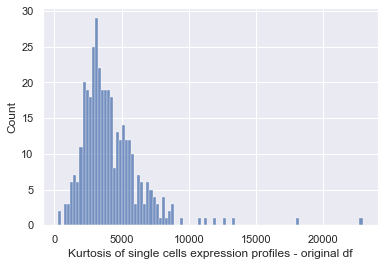%0A)

For reference Skewness and Kurtosis for a normal distribution are below.

In \[27\]:

    xnorm = np.random.normal(0, 2, 10000000)   # create random values based on a normal distribution
    xnorm 

    print( "Excess kurtosis of normal distribution: ",  kurtosis(xnorm) )
    print( "Skewness of normal distribution: ", skew(xnorm) )

    Excess kurtosis of normal distribution:  -0.0030042602669548835
    Skewness of normal distribution:  -0.000733958096450209

The distribution are highly non-normal, skewed with heavy tails. Why is
this a problem?

***Data transformation*** can be an option. For example, you can try to
log the data. Log based 2 is often used as +1 indicate doubling of the
feature abundance (gene expression in this case) and -1 halving of the
feature abundance/gene expression. In this way, changes in the values of
the feature upwards or downwards are symmetrical, so up-regulation and
down-regulation of a gene with respect to a control is symmetrical.

In \[29\]:

    df11_log2 = np.log2(df[cnames[1]]+1)
    sns.boxplot(x=df11_log2)

Out\[29\]:

    <AxesSubplot:xlabel='"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"'>

![](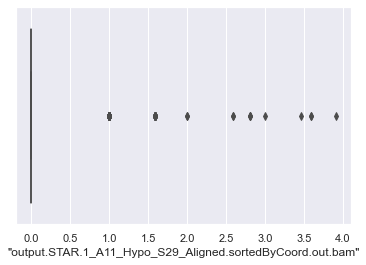%0A)

In \[30\]:

    sns.violinplot(x=df11_log2)

Out\[30\]:

    <AxesSubplot:xlabel='"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"'>

![](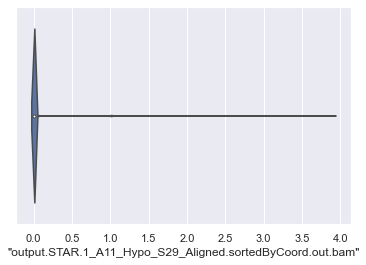%0A)

We can check the summary statistics again, and plot the trasformed gene
expression profile of each cell

In \[31\]:

    display(df11_log2.describe().round(2))

    count    22934.00
    mean         0.01
    std          0.12
    min          0.00
    25%          0.00
    50%          0.00
    75%          0.00
    max          3.91
    Name: "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam", dtype: float64

In \[32\]:

    df1 = df + 1
    df1_log2 = df1.apply(np.log2)
    # I'm selecting part of the data as the plots would otherwise take too long to generate
    df1_log2_small = df1_log2.iloc[:, :50]
    np.shape(df1_log2_small)
    plt.figure(figsize=(16,4))
    plot=sns.violinplot(data=df1_log2_small,palette="Set3",cut=0)
    plt.setp(plot.get_xticklabels(), rotation=90)

Out\[32\]:

    [None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None,
     None]

![](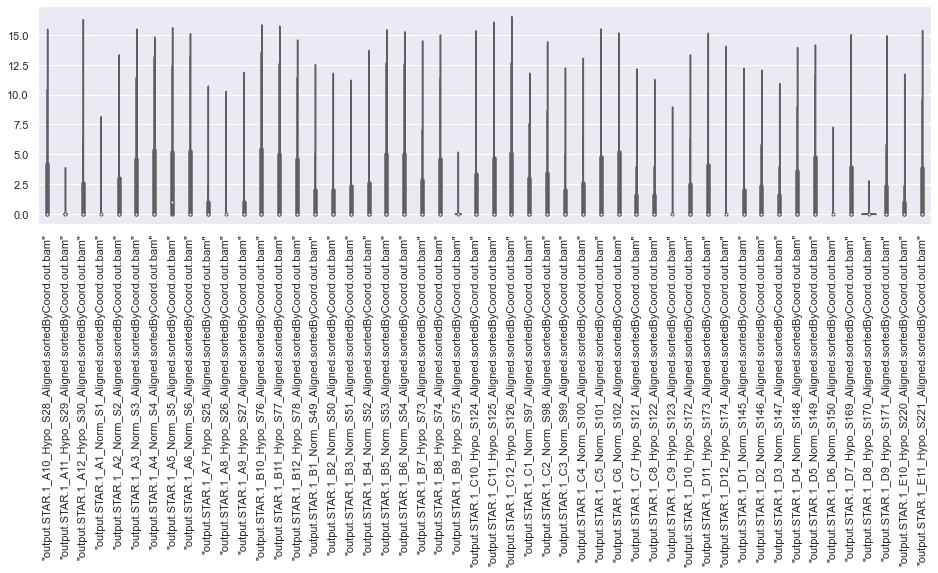%0A)

In \[33\]:

    df1_log2_skew_cells = []
    for i in range(colN) :     
         v_df = df1_log2[cnames[i]]
         df1_log2_skew_cells += [skew(v_df)]   
    df1_log2_skew_cells
    sns.histplot(df1_log2_skew_cells,bins=100)
    plt.xlabel('Skewness of single cells expression profiles - log2 df')

Out\[33\]:

    Text(0.5, 0, 'Skewness of single cells expression profiles - log2 df')

![](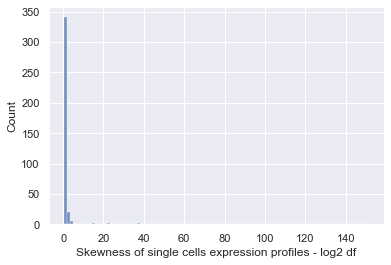%0A)

In \[34\]:

    df1_log2_kurt_cells = []
    for i in range(colN) :     
         v_df = df1_log2[cnames[i]]
         df1_log2_kurt_cells += [kurtosis(v_df)] 
     f1_log2_kurt_cells
    sns.histplot(df1_log2_kurt_cells,bins=100)
    plt.xlabel('Kurtosis of single cells expression profiles - log2 df')

Out\[34\]:

    Text(0.5, 0, 'Kurtosis of single cells expression profiles - log2 df')

![](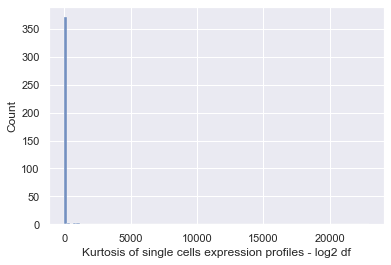%0A)

If we are happy with this transformation we can use this transformed
data in what follows.

In \[35\]:

    df = df1_log2

------------------------------------------------------------------------

Each single cell was sequenced independently, so there might be need of
normalizing the data between cells. Let's plot the gene expression
distributions for each cell, and compare them.

In \[38\]:

    df_small = df.iloc[:, 10:30]  #just selecting part of the samples so run time not too long
    sns.displot(data=df_small,palette="Set3",kind="kde", bw_adjust=2)

Out\[38\]:

    <seaborn.axisgrid.FacetGrid at 0x2d99a0eb5e0>

![](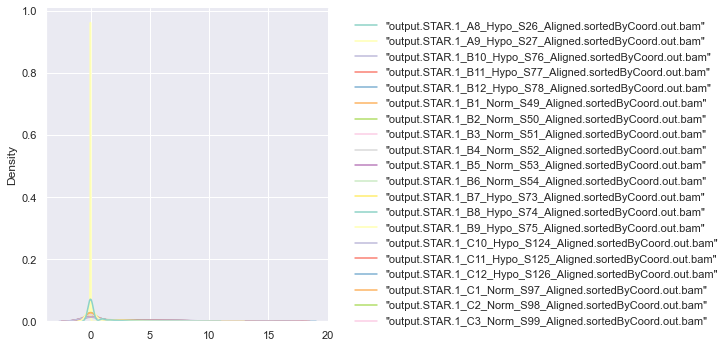%0A)

By looking at these plots, do you think the data are ***normalized***?
How would you normalize them?

Try the plots above both with the "...unfiltered...txt" (not filtered
and not normalized), "...filtered...txt" (filtered but not normalized)",
and with the "..normalized...txt" data.

------------------------------------------------------------------------

It can also be useful to check for ***duplicate raws***. These can often
happen in any data recording tasks. In our case, there could be some
features that have the same counts across experiments but different
names. There could be many reasons why this happens. They could be the
same entity as there is redundacy in gene annotation, or they could
reflect other issues, for example when in the same region there are
overlapping gene annotations. It is useful to inspect and maybe drop one
of the duplicate features. However, this needs to be noted and recorded,
as it could create issues with data interpretation later on. For
example, in our case, if two genes have the same counts we could drop
one, as they are likely to be two different annotations of the same gene
(or genes with overlapping genomic regions for which we cannot resolve
differences in expression). If we consider both of the duplicate
features/genes, we are potentially duplicating data, creating a bias.
However, if we drop one of them we will miss it in further analyses. For
example, the gene that has been dropped could be the one corresponding
to the most recurring annotation in previous studies. If we dropped this
feature without recording this in a log file, we would miss an important
biological link between the current study and historical studies.

In \[39\]:

    duplicate_rows_df = df[df.duplicated(keep=False)]
    print("number of duplicate rows: ", duplicate_rows_df.shape)
    print("number of duplicate rows: ", duplicate_rows_df)

    number of duplicate rows:  (56, 383)
    number of duplicate rows:                     "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0            
    "IL12RB2"                                                        0.0            
    "S1PR1"                                                          0.0            
    "CD84"                                                           0.0            
    "GNLY"                                                           0.0            
    "FAR2P3"                                                         0.0            
    "KLF2P3"                                                         0.0            
    "PABPC1P2"                                                       0.0            
    "UGT1A8"                                                         0.0            
    "UGT1A9"                                                         0.0            
    "SLC22A14"                                                       0.0            
    "COQ10BP2"                                                       0.0            
    "PANDAR"                                                         0.0            
    "LAP3P2"                                                         0.0            
    "RPL22P16"                                                       0.0            
    "GALNT17"                                                        0.0            
    "PON1"                                                           0.0            
    "HTR5A"                                                          0.0            
    "SNORA36A"                                                       0.0            
    "MIR664B"                                                        0.0            
    "CSMD1"                                                          0.0            
    "KCNS2"                                                          0.0            
    "MIR548AA1"                                                      0.0            
    "MIR548D1"                                                       0.0            
    "MTCO2P11"                                                       0.0            
    "CLCN3P1"                                                        0.0            
    "SUGT1P4-STRA6LP"                                                0.0            
    "STRA6LP"                                                        0.0            
    "MUC6"                                                           0.0            
    "VSTM4"                                                          0.0            
    "LINC00856"                                                      0.0            
    "LINC00595"                                                      0.0            
    "CACYBPP1"                                                       0.0            
    "LINC00477"                                                      0.0            
    "KNOP1P1"                                                        0.0            
    "WDR95P"                                                         0.0            
    "MIR20A"                                                         0.0            
    "MIR19B1"                                                        0.0            
    "RPL21P5"                                                        0.0            
    "RNU6-539P"                                                      0.0            
    "SNRPN"                                                          0.0            
    "SNURF"                                                          0.0            
    "RBFOX1"                                                         0.0            
    "LINC02183"                                                      0.0            
    "MT1M"                                                           0.0            
    "ASPA"                                                           0.0            
    "BCL6B"                                                          0.0            
    "CCL3L3"                                                         0.0            
    "CCL3L1"                                                         0.0            
    "OTOP3"                                                          0.0            
    "RNA5SP450"                                                      0.0            
    "PSG1"                                                           0.0            
    "MIR3190"                                                        0.0            
    "MIR3191"                                                        0.0            
    "SEZ6L"                                                          0.0            
    "ADAMTS5"                                                        0.0            

                       "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0            
    "IL12RB2"                                                        0.0            
    "S1PR1"                                                          0.0            
    "CD84"                                                           0.0            
    "GNLY"                                                           0.0            
    "FAR2P3"                                                         0.0            
    "KLF2P3"                                                         0.0            
    "PABPC1P2"                                                       0.0            
    "UGT1A8"                                                         0.0            
    "UGT1A9"                                                         0.0            
    "SLC22A14"                                                       0.0            
    "COQ10BP2"                                                       0.0            
    "PANDAR"                                                         0.0            
    "LAP3P2"                                                         0.0            
    "RPL22P16"                                                       0.0            
    "GALNT17"                                                        0.0            
    "PON1"                                                           0.0            
    "HTR5A"                                                          0.0            
    "SNORA36A"                                                       0.0            
    "MIR664B"                                                        0.0            
    "CSMD1"                                                          0.0            
    "KCNS2"                                                          0.0            
    "MIR548AA1"                                                      0.0            
    "MIR548D1"                                                       0.0            
    "MTCO2P11"                                                       0.0            
    "CLCN3P1"                                                        0.0            
    "SUGT1P4-STRA6LP"                                                0.0            
    "STRA6LP"                                                        0.0            
    "MUC6"                                                           0.0            
    "VSTM4"                                                          0.0            
    "LINC00856"                                                      0.0            
    "LINC00595"                                                      0.0            
    "CACYBPP1"                                                       0.0            
    "LINC00477"                                                      0.0            
    "KNOP1P1"                                                        0.0            
    "WDR95P"                                                         0.0            
    "MIR20A"                                                         0.0            
    "MIR19B1"                                                        0.0            
    "RPL21P5"                                                        0.0            
    "RNU6-539P"                                                      0.0            
    "SNRPN"                                                          0.0            
    "SNURF"                                                          0.0            
    "RBFOX1"                                                         0.0            
    "LINC02183"                                                      0.0            
    "MT1M"                                                           0.0            
    "ASPA"                                                           0.0            
    "BCL6B"                                                          0.0            
    "CCL3L3"                                                         0.0            
    "CCL3L1"                                                         0.0            
    "OTOP3"                                                          0.0            
    "RNA5SP450"                                                      0.0            
    "PSG1"                                                           0.0            
    "MIR3190"                                                        0.0            
    "MIR3191"                                                        0.0            
    "SEZ6L"                                                          0.0            
    "ADAMTS5"                                                        0.0            

                       "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                  0.000000            
    "IL12RB2"                                                   0.000000            
    "S1PR1"                                                     0.000000            
    "CD84"                                                      0.000000            
    "GNLY"                                                      0.000000            
    "FAR2P3"                                                    0.000000            
    "KLF2P3"                                                    0.000000            
    "PABPC1P2"                                                  0.000000            
    "UGT1A8"                                                    5.857981            
    "UGT1A9"                                                    5.857981            
    "SLC22A14"                                                  0.000000            
    "COQ10BP2"                                                  0.000000            
    "PANDAR"                                                    0.000000            
    "LAP3P2"                                                    0.000000            
    "RPL22P16"                                                  0.000000            
    "GALNT17"                                                   0.000000            
    "PON1"                                                      0.000000            
    "HTR5A"                                                     0.000000            
    "SNORA36A"                                                  0.000000            
    "MIR664B"                                                   0.000000            
    "CSMD1"                                                     0.000000            
    "KCNS2"                                                     0.000000            
    "MIR548AA1"                                                 0.000000            
    "MIR548D1"                                                  0.000000            
    "MTCO2P11"                                                  0.000000            
    "CLCN3P1"                                                   0.000000            
    "SUGT1P4-STRA6LP"                                           0.000000            
    "STRA6LP"                                                   0.000000            
    "MUC6"                                                      0.000000            
    "VSTM4"                                                     0.000000            
    "LINC00856"                                                 0.000000            
    "LINC00595"                                                 0.000000            
    "CACYBPP1"                                                  0.000000            
    "LINC00477"                                                 0.000000            
    "KNOP1P1"                                                   0.000000            
    "WDR95P"                                                    0.000000            
    "MIR20A"                                                    0.000000            
    "MIR19B1"                                                   0.000000            
    "RPL21P5"                                                   0.000000            
    "RNU6-539P"                                                 0.000000            
    "SNRPN"                                                     0.000000            
    "SNURF"                                                     0.000000            
    "RBFOX1"                                                    0.000000            
    "LINC02183"                                                 0.000000            
    "MT1M"                                                      0.000000            
    "ASPA"                                                      0.000000            
    "BCL6B"                                                     0.000000            
    "CCL3L3"                                                    0.000000            
    "CCL3L1"                                                    0.000000            
    "OTOP3"                                                     0.000000            
    "RNA5SP450"                                                 0.000000            
    "PSG1"                                                      0.000000            
    "MIR3190"                                                   0.000000            
    "MIR3191"                                                   0.000000            
    "SEZ6L"                                                     0.000000            
    "ADAMTS5"                                                   0.000000            

                       "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0          
    "IL12RB2"                                                        0.0          
    "S1PR1"                                                          0.0          
    "CD84"                                                           0.0          
    "GNLY"                                                           0.0          
    "FAR2P3"                                                         0.0          
    "KLF2P3"                                                         0.0          
    "PABPC1P2"                                                       0.0          
    "UGT1A8"                                                         0.0          
    "UGT1A9"                                                         0.0          
    "SLC22A14"                                                       0.0          
    "COQ10BP2"                                                       0.0          
    "PANDAR"                                                         0.0          
    "LAP3P2"                                                         0.0          
    "RPL22P16"                                                       0.0          
    "GALNT17"                                                        0.0          
    "PON1"                                                           0.0          
    "HTR5A"                                                          0.0          
    "SNORA36A"                                                       0.0          
    "MIR664B"                                                        0.0          
    "CSMD1"                                                          0.0          
    "KCNS2"                                                          0.0          
    "MIR548AA1"                                                      0.0          
    "MIR548D1"                                                       0.0          
    "MTCO2P11"                                                       0.0          
    "CLCN3P1"                                                        0.0          
    "SUGT1P4-STRA6LP"                                                0.0          
    "STRA6LP"                                                        0.0          
    "MUC6"                                                           0.0          
    "VSTM4"                                                          0.0          
    "LINC00856"                                                      0.0          
    "LINC00595"                                                      0.0          
    "CACYBPP1"                                                       0.0          
    "LINC00477"                                                      0.0          
    "KNOP1P1"                                                        0.0          
    "WDR95P"                                                         0.0          
    "MIR20A"                                                         0.0          
    "MIR19B1"                                                        0.0          
    "RPL21P5"                                                        0.0          
    "RNU6-539P"                                                      0.0          
    "SNRPN"                                                          0.0          
    "SNURF"                                                          0.0          
    "RBFOX1"                                                         0.0          
    "LINC02183"                                                      0.0          
    "MT1M"                                                           0.0          
    "ASPA"                                                           0.0          
    "BCL6B"                                                          0.0          
    "CCL3L3"                                                         0.0          
    "CCL3L1"                                                         0.0          
    "OTOP3"                                                          0.0          
    "RNA5SP450"                                                      0.0          
    "PSG1"                                                           0.0          
    "MIR3190"                                                        0.0          
    "MIR3191"                                                        0.0          
    "SEZ6L"                                                          0.0          
    "ADAMTS5"                                                        0.0          

                       "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0          
    "IL12RB2"                                                        0.0          
    "S1PR1"                                                          0.0          
    "CD84"                                                           0.0          
    "GNLY"                                                           0.0          
    "FAR2P3"                                                         0.0          
    "KLF2P3"                                                         0.0          
    "PABPC1P2"                                                       0.0          
    "UGT1A8"                                                         0.0          
    "UGT1A9"                                                         0.0          
    "SLC22A14"                                                       0.0          
    "COQ10BP2"                                                       0.0          
    "PANDAR"                                                         0.0          
    "LAP3P2"                                                         0.0          
    "RPL22P16"                                                       0.0          
    "GALNT17"                                                        0.0          
    "PON1"                                                           0.0          
    "HTR5A"                                                          0.0          
    "SNORA36A"                                                       0.0          
    "MIR664B"                                                        0.0          
    "CSMD1"                                                          0.0          
    "KCNS2"                                                          0.0          
    "MIR548AA1"                                                      0.0          
    "MIR548D1"                                                       0.0          
    "MTCO2P11"                                                       0.0          
    "CLCN3P1"                                                        0.0          
    "SUGT1P4-STRA6LP"                                                0.0          
    "STRA6LP"                                                        0.0          
    "MUC6"                                                           0.0          
    "VSTM4"                                                          0.0          
    "LINC00856"                                                      0.0          
    "LINC00595"                                                      0.0          
    "CACYBPP1"                                                       0.0          
    "LINC00477"                                                      0.0          
    "KNOP1P1"                                                        0.0          
    "WDR95P"                                                         0.0          
    "MIR20A"                                                         0.0          
    "MIR19B1"                                                        0.0          
    "RPL21P5"                                                        0.0          
    "RNU6-539P"                                                      0.0          
    "SNRPN"                                                          0.0          
    "SNURF"                                                          0.0          
    "RBFOX1"                                                         0.0          
    "LINC02183"                                                      0.0          
    "MT1M"                                                           0.0          
    "ASPA"                                                           0.0          
    "BCL6B"                                                          0.0          
    "CCL3L3"                                                         0.0          
    "CCL3L1"                                                         0.0          
    "OTOP3"                                                          0.0          
    "RNA5SP450"                                                      0.0          
    "PSG1"                                                           0.0          
    "MIR3190"                                                        0.0          
    "MIR3191"                                                        0.0          
    "SEZ6L"                                                          0.0          
    "ADAMTS5"                                                        0.0          

                       "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0          
    "IL12RB2"                                                        0.0          
    "S1PR1"                                                          0.0          
    "CD84"                                                           0.0          
    "GNLY"                                                           0.0          
    "FAR2P3"                                                         0.0          
    "KLF2P3"                                                         0.0          
    "PABPC1P2"                                                       0.0          
    "UGT1A8"                                                         0.0          
    "UGT1A9"                                                         0.0          
    "SLC22A14"                                                       0.0          
    "COQ10BP2"                                                       0.0          
    "PANDAR"                                                         1.0          
    "LAP3P2"                                                         1.0          
    "RPL22P16"                                                       0.0          
    "GALNT17"                                                        0.0          
    "PON1"                                                           0.0          
    "HTR5A"                                                          0.0          
    "SNORA36A"                                                       0.0          
    "MIR664B"                                                        0.0          
    "CSMD1"                                                          0.0          
    "KCNS2"                                                          0.0          
    "MIR548AA1"                                                      0.0          
    "MIR548D1"                                                       0.0          
    "MTCO2P11"                                                       0.0          
    "CLCN3P1"                                                        0.0          
    "SUGT1P4-STRA6LP"                                                0.0          
    "STRA6LP"                                                        0.0          
    "MUC6"                                                           0.0          
    "VSTM4"                                                          0.0          
    "LINC00856"                                                      0.0          
    "LINC00595"                                                      0.0          
    "CACYBPP1"                                                       0.0          
    "LINC00477"                                                      0.0          
    "KNOP1P1"                                                        0.0          
    "WDR95P"                                                         0.0          
    "MIR20A"                                                         0.0          
    "MIR19B1"                                                        0.0          
    "RPL21P5"                                                        0.0          
    "RNU6-539P"                                                      0.0          
    "SNRPN"                                                          0.0          
    "SNURF"                                                          0.0          
    "RBFOX1"                                                         0.0          
    "LINC02183"                                                      0.0          
    "MT1M"                                                           0.0          
    "ASPA"                                                           0.0          
    "BCL6B"                                                          0.0          
    "CCL3L3"                                                         0.0          
    "CCL3L1"                                                         0.0          
    "OTOP3"                                                          0.0          
    "RNA5SP450"                                                      0.0          
    "PSG1"                                                           0.0          
    "MIR3190"                                                        0.0          
    "MIR3191"                                                        0.0          
    "SEZ6L"                                                          0.0          
    "ADAMTS5"                                                        0.0          

                       "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                  0.000000          
    "IL12RB2"                                                   0.000000          
    "S1PR1"                                                     0.000000          
    "CD84"                                                      0.000000          
    "GNLY"                                                      0.000000          
    "FAR2P3"                                                    0.000000          
    "KLF2P3"                                                    0.000000          
    "PABPC1P2"                                                  0.000000          
    "UGT1A8"                                                    0.000000          
    "UGT1A9"                                                    0.000000          
    "SLC22A14"                                                  0.000000          
    "COQ10BP2"                                                  0.000000          
    "PANDAR"                                                    0.000000          
    "LAP3P2"                                                    0.000000          
    "RPL22P16"                                                  0.000000          
    "GALNT17"                                                   0.000000          
    "PON1"                                                      0.000000          
    "HTR5A"                                                     0.000000          
    "SNORA36A"                                                  0.000000          
    "MIR664B"                                                   0.000000          
    "CSMD1"                                                     0.000000          
    "KCNS2"                                                     0.000000          
    "MIR548AA1"                                                 0.000000          
    "MIR548D1"                                                  0.000000          
    "MTCO2P11"                                                  0.000000          
    "CLCN3P1"                                                   0.000000          
    "SUGT1P4-STRA6LP"                                           1.584963          
    "STRA6LP"                                                   1.584963          
    "MUC6"                                                      0.000000          
    "VSTM4"                                                     0.000000          
    "LINC00856"                                                 0.000000          
    "LINC00595"                                                 0.000000          
    "CACYBPP1"                                                  0.000000          
    "LINC00477"                                                 0.000000          
    "KNOP1P1"                                                   0.000000          
    "WDR95P"                                                    0.000000          
    "MIR20A"                                                    0.000000          
    "MIR19B1"                                                   0.000000          
    "RPL21P5"                                                   0.000000          
    "RNU6-539P"                                                 0.000000          
    "SNRPN"                                                     0.000000          
    "SNURF"                                                     0.000000          
    "RBFOX1"                                                    0.000000          
    "LINC02183"                                                 0.000000          
    "MT1M"                                                      0.000000          
    "ASPA"                                                      0.000000          
    "BCL6B"                                                     0.000000          
    "CCL3L3"                                                    0.000000          
    "CCL3L1"                                                    0.000000          
    "OTOP3"                                                     0.000000          
    "RNA5SP450"                                                 0.000000          
    "PSG1"                                                      0.000000          
    "MIR3190"                                                   0.000000          
    "MIR3191"                                                   0.000000          
    "SEZ6L"                                                     0.000000          
    "ADAMTS5"                                                   0.000000          

                       "output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0          
    "IL12RB2"                                                        0.0          
    "S1PR1"                                                          0.0          
    "CD84"                                                           0.0          
    "GNLY"                                                           0.0          
    "FAR2P3"                                                         0.0          
    "KLF2P3"                                                         0.0          
    "PABPC1P2"                                                       0.0          
    "UGT1A8"                                                         0.0          
    "UGT1A9"                                                         0.0          
    "SLC22A14"                                                       0.0          
    "COQ10BP2"                                                       0.0          
    "PANDAR"                                                         0.0          
    "LAP3P2"                                                         0.0          
    "RPL22P16"                                                       0.0          
    "GALNT17"                                                        0.0          
    "PON1"                                                           0.0          
    "HTR5A"                                                          0.0          
    "SNORA36A"                                                       0.0          
    "MIR664B"                                                        0.0          
    "CSMD1"                                                          0.0          
    "KCNS2"                                                          0.0          
    "MIR548AA1"                                                      0.0          
    "MIR548D1"                                                       0.0          
    "MTCO2P11"                                                       0.0          
    "CLCN3P1"                                                        0.0          
    "SUGT1P4-STRA6LP"                                                0.0          
    "STRA6LP"                                                        0.0          
    "MUC6"                                                           0.0          
    "VSTM4"                                                          0.0          
    "LINC00856"                                                      0.0          
    "LINC00595"                                                      0.0          
    "CACYBPP1"                                                       0.0          
    "LINC00477"                                                      0.0          
    "KNOP1P1"                                                        0.0          
    "WDR95P"                                                         0.0          
    "MIR20A"                                                         0.0          
    "MIR19B1"                                                        0.0          
    "RPL21P5"                                                        0.0          
    "RNU6-539P"                                                      0.0          
    "SNRPN"                                                          0.0          
    "SNURF"                                                          0.0          
    "RBFOX1"                                                         0.0          
    "LINC02183"                                                      0.0          
    "MT1M"                                                           0.0          
    "ASPA"                                                           0.0          
    "BCL6B"                                                          0.0          
    "CCL3L3"                                                         0.0          
    "CCL3L1"                                                         0.0          
    "OTOP3"                                                          0.0          
    "RNA5SP450"                                                      0.0          
    "PSG1"                                                           0.0          
    "MIR3190"                                                        0.0          
    "MIR3191"                                                        0.0          
    "SEZ6L"                                                          0.0          
    "ADAMTS5"                                                        0.0          

                       "output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0          
    "IL12RB2"                                                        0.0          
    "S1PR1"                                                          0.0          
    "CD84"                                                           0.0          
    "GNLY"                                                           0.0          
    "FAR2P3"                                                         0.0          
    "KLF2P3"                                                         0.0          
    "PABPC1P2"                                                       0.0          
    "UGT1A8"                                                         0.0          
    "UGT1A9"                                                         0.0          
    "SLC22A14"                                                       0.0          
    "COQ10BP2"                                                       0.0          
    "PANDAR"                                                         0.0          
    "LAP3P2"                                                         0.0          
    "RPL22P16"                                                       0.0          
    "GALNT17"                                                        0.0          
    "PON1"                                                           0.0          
    "HTR5A"                                                          0.0          
    "SNORA36A"                                                       0.0          
    "MIR664B"                                                        0.0          
    "CSMD1"                                                          0.0          
    "KCNS2"                                                          0.0          
    "MIR548AA1"                                                      0.0          
    "MIR548D1"                                                       0.0          
    "MTCO2P11"                                                       0.0          
    "CLCN3P1"                                                        0.0          
    "SUGT1P4-STRA6LP"                                                0.0          
    "STRA6LP"                                                        0.0          
    "MUC6"                                                           0.0          
    "VSTM4"                                                          0.0          
    "LINC00856"                                                      0.0          
    "LINC00595"                                                      0.0          
    "CACYBPP1"                                                       0.0          
    "LINC00477"                                                      0.0          
    "KNOP1P1"                                                        0.0          
    "WDR95P"                                                         0.0          
    "MIR20A"                                                         0.0          
    "MIR19B1"                                                        0.0          
    "RPL21P5"                                                        0.0          
    "RNU6-539P"                                                      0.0          
    "SNRPN"                                                          0.0          
    "SNURF"                                                          0.0          
    "RBFOX1"                                                         0.0          
    "LINC02183"                                                      0.0          
    "MT1M"                                                           0.0          
    "ASPA"                                                           0.0          
    "BCL6B"                                                          0.0          
    "CCL3L3"                                                         0.0          
    "CCL3L1"                                                         0.0          
    "OTOP3"                                                          0.0          
    "RNA5SP450"                                                      0.0          
    "PSG1"                                                           0.0          
    "MIR3190"                                                        0.0          
    "MIR3191"                                                        0.0          
    "SEZ6L"                                                          0.0          
    "ADAMTS5"                                                        0.0          

                       "output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0           
    "IL12RB2"                                                        0.0           
    "S1PR1"                                                          0.0           
    "CD84"                                                           0.0           
    "GNLY"                                                           0.0           
    "FAR2P3"                                                         0.0           
    "KLF2P3"                                                         0.0           
    "PABPC1P2"                                                       0.0           
    "UGT1A8"                                                         0.0           
    "UGT1A9"                                                         0.0           
    "SLC22A14"                                                       0.0           
    "COQ10BP2"                                                       0.0           
    "PANDAR"                                                         0.0           
    "LAP3P2"                                                         0.0           
    "RPL22P16"                                                       0.0           
    "GALNT17"                                                        0.0           
    "PON1"                                                           0.0           
    "HTR5A"                                                          0.0           
    "SNORA36A"                                                       0.0           
    "MIR664B"                                                        0.0           
    "CSMD1"                                                          0.0           
    "KCNS2"                                                          0.0           
    "MIR548AA1"                                                      0.0           
    "MIR548D1"                                                       0.0           
    "MTCO2P11"                                                       0.0           
    "CLCN3P1"                                                        0.0           
    "SUGT1P4-STRA6LP"                                                0.0           
    "STRA6LP"                                                        0.0           
    "MUC6"                                                           0.0           
    "VSTM4"                                                          0.0           
    "LINC00856"                                                      0.0           
    "LINC00595"                                                      0.0           
    "CACYBPP1"                                                       0.0           
    "LINC00477"                                                      0.0           
    "KNOP1P1"                                                        0.0           
    "WDR95P"                                                         0.0           
    "MIR20A"                                                         0.0           
    "MIR19B1"                                                        0.0           
    "RPL21P5"                                                        0.0           
    "RNU6-539P"                                                      0.0           
    "SNRPN"                                                          0.0           
    "SNURF"                                                          0.0           
    "RBFOX1"                                                         0.0           
    "LINC02183"                                                      0.0           
    "MT1M"                                                           0.0           
    "ASPA"                                                           0.0           
    "BCL6B"                                                          0.0           
    "CCL3L3"                                                         0.0           
    "CCL3L1"                                                         0.0           
    "OTOP3"                                                          0.0           
    "RNA5SP450"                                                      0.0           
    "PSG1"                                                           0.0           
    "MIR3190"                                                        0.0           
    "MIR3191"                                                        0.0           
    "SEZ6L"                                                          0.0           
    "ADAMTS5"                                                        0.0           

                       ...  \
    "SHISAL2A"         ...   
    "IL12RB2"          ...   
    "S1PR1"            ...   
    "CD84"             ...   
    "GNLY"             ...   
    "FAR2P3"           ...   
    "KLF2P3"           ...   
    "PABPC1P2"         ...   
    "UGT1A8"           ...   
    "UGT1A9"           ...   
    "SLC22A14"         ...   
    "COQ10BP2"         ...   
    "PANDAR"           ...   
    "LAP3P2"           ...   
    "RPL22P16"         ...   
    "GALNT17"          ...   
    "PON1"             ...   
    "HTR5A"            ...   
    "SNORA36A"         ...   
    "MIR664B"          ...   
    "CSMD1"            ...   
    "KCNS2"            ...   
    "MIR548AA1"        ...   
    "MIR548D1"         ...   
    "MTCO2P11"         ...   
    "CLCN3P1"          ...   
    "SUGT1P4-STRA6LP"  ...   
    "STRA6LP"          ...   
    "MUC6"             ...   
    "VSTM4"            ...   
    "LINC00856"        ...   
    "LINC00595"        ...   
    "CACYBPP1"         ...   
    "LINC00477"        ...   
    "KNOP1P1"          ...   
    "WDR95P"           ...   
    "MIR20A"           ...   
    "MIR19B1"          ...   
    "RPL21P5"          ...   
    "RNU6-539P"        ...   
    "SNRPN"            ...   
    "SNURF"            ...   
    "RBFOX1"           ...   
    "LINC02183"        ...   
    "MT1M"             ...   
    "ASPA"             ...   
    "BCL6B"            ...   
    "CCL3L3"           ...   
    "CCL3L1"           ...   
    "OTOP3"            ...   
    "RNA5SP450"        ...   
    "PSG1"             ...   
    "MIR3190"          ...   
    "MIR3191"          ...   
    "SEZ6L"            ...   
    "ADAMTS5"          ...   

                       "output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0             
    "IL12RB2"                                                        0.0             
    "S1PR1"                                                          0.0             
    "CD84"                                                           0.0             
    "GNLY"                                                           0.0             
    "FAR2P3"                                                         0.0             
    "KLF2P3"                                                         0.0             
    "PABPC1P2"                                                       0.0             
    "UGT1A8"                                                         0.0             
    "UGT1A9"                                                         0.0             
    "SLC22A14"                                                       0.0             
    "COQ10BP2"                                                       0.0             
    "PANDAR"                                                         0.0             
    "LAP3P2"                                                         0.0             
    "RPL22P16"                                                       0.0             
    "GALNT17"                                                        0.0             
    "PON1"                                                           0.0             
    "HTR5A"                                                          0.0             
    "SNORA36A"                                                       0.0             
    "MIR664B"                                                        0.0             
    "CSMD1"                                                          0.0             
    "KCNS2"                                                          0.0             
    "MIR548AA1"                                                      0.0             
    "MIR548D1"                                                       0.0             
    "MTCO2P11"                                                       0.0             
    "CLCN3P1"                                                        0.0             
    "SUGT1P4-STRA6LP"                                                0.0             
    "STRA6LP"                                                        0.0             
    "MUC6"                                                           0.0             
    "VSTM4"                                                          0.0             
    "LINC00856"                                                      0.0             
    "LINC00595"                                                      0.0             
    "CACYBPP1"                                                       0.0             
    "LINC00477"                                                      0.0             
    "KNOP1P1"                                                        0.0             
    "WDR95P"                                                         0.0             
    "MIR20A"                                                         0.0             
    "MIR19B1"                                                        0.0             
    "RPL21P5"                                                        0.0             
    "RNU6-539P"                                                      0.0             
    "SNRPN"                                                          0.0             
    "SNURF"                                                          0.0             
    "RBFOX1"                                                         0.0             
    "LINC02183"                                                      0.0             
    "MT1M"                                                           0.0             
    "ASPA"                                                           0.0             
    "BCL6B"                                                          0.0             
    "CCL3L3"                                                         0.0             
    "CCL3L1"                                                         0.0             
    "OTOP3"                                                          0.0             
    "RNA5SP450"                                                      0.0             
    "PSG1"                                                           0.0             
    "MIR3190"                                                        0.0             
    "MIR3191"                                                        0.0             
    "SEZ6L"                                                          0.0             
    "ADAMTS5"                                                        0.0             

                       "output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0            
    "IL12RB2"                                                        0.0            
    "S1PR1"                                                          0.0            
    "CD84"                                                           0.0            
    "GNLY"                                                           0.0            
    "FAR2P3"                                                         0.0            
    "KLF2P3"                                                         0.0            
    "PABPC1P2"                                                       0.0            
    "UGT1A8"                                                         0.0            
    "UGT1A9"                                                         0.0            
    "SLC22A14"                                                       0.0            
    "COQ10BP2"                                                       0.0            
    "PANDAR"                                                         0.0            
    "LAP3P2"                                                         0.0            
    "RPL22P16"                                                       0.0            
    "GALNT17"                                                        0.0            
    "PON1"                                                           0.0            
    "HTR5A"                                                          0.0            
    "SNORA36A"                                                       0.0            
    "MIR664B"                                                        0.0            
    "CSMD1"                                                          0.0            
    "KCNS2"                                                          0.0            
    "MIR548AA1"                                                      0.0            
    "MIR548D1"                                                       0.0            
    "MTCO2P11"                                                       0.0            
    "CLCN3P1"                                                        0.0            
    "SUGT1P4-STRA6LP"                                                0.0            
    "STRA6LP"                                                        0.0            
    "MUC6"                                                           0.0            
    "VSTM4"                                                          0.0            
    "LINC00856"                                                      0.0            
    "LINC00595"                                                      0.0            
    "CACYBPP1"                                                       0.0            
    "LINC00477"                                                      0.0            
    "KNOP1P1"                                                        0.0            
    "WDR95P"                                                         0.0            
    "MIR20A"                                                         0.0            
    "MIR19B1"                                                        0.0            
    "RPL21P5"                                                        0.0            
    "RNU6-539P"                                                      0.0            
    "SNRPN"                                                          0.0            
    "SNURF"                                                          0.0            
    "RBFOX1"                                                         0.0            
    "LINC02183"                                                      0.0            
    "MT1M"                                                           0.0            
    "ASPA"                                                           0.0            
    "BCL6B"                                                          0.0            
    "CCL3L3"                                                         0.0            
    "CCL3L1"                                                         0.0            
    "OTOP3"                                                          0.0            
    "RNA5SP450"                                                      0.0            
    "PSG1"                                                           0.0            
    "MIR3190"                                                        0.0            
    "MIR3191"                                                        0.0            
    "SEZ6L"                                                          0.0            
    "ADAMTS5"                                                        0.0            

                       "output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0            
    "IL12RB2"                                                        0.0            
    "S1PR1"                                                          0.0            
    "CD84"                                                           0.0            
    "GNLY"                                                           0.0            
    "FAR2P3"                                                         0.0            
    "KLF2P3"                                                         0.0            
    "PABPC1P2"                                                       0.0            
    "UGT1A8"                                                         0.0            
    "UGT1A9"                                                         0.0            
    "SLC22A14"                                                       0.0            
    "COQ10BP2"                                                       0.0            
    "PANDAR"                                                         1.0            
    "LAP3P2"                                                         1.0            
    "RPL22P16"                                                       0.0            
    "GALNT17"                                                        0.0            
    "PON1"                                                           0.0            
    "HTR5A"                                                          0.0            
    "SNORA36A"                                                       0.0            
    "MIR664B"                                                        0.0            
    "CSMD1"                                                          0.0            
    "KCNS2"                                                          0.0            
    "MIR548AA1"                                                      0.0            
    "MIR548D1"                                                       0.0            
    "MTCO2P11"                                                       0.0            
    "CLCN3P1"                                                        0.0            
    "SUGT1P4-STRA6LP"                                                0.0            
    "STRA6LP"                                                        0.0            
    "MUC6"                                                           0.0            
    "VSTM4"                                                          0.0            
    "LINC00856"                                                      0.0            
    "LINC00595"                                                      0.0            
    "CACYBPP1"                                                       0.0            
    "LINC00477"                                                      0.0            
    "KNOP1P1"                                                        0.0            
    "WDR95P"                                                         0.0            
    "MIR20A"                                                         0.0            
    "MIR19B1"                                                        0.0            
    "RPL21P5"                                                        0.0            
    "RNU6-539P"                                                      0.0            
    "SNRPN"                                                          0.0            
    "SNURF"                                                          0.0            
    "RBFOX1"                                                         0.0            
    "LINC02183"                                                      0.0            
    "MT1M"                                                           0.0            
    "ASPA"                                                           0.0            
    "BCL6B"                                                          0.0            
    "CCL3L3"                                                         0.0            
    "CCL3L1"                                                         0.0            
    "OTOP3"                                                          0.0            
    "RNA5SP450"                                                      0.0            
    "PSG1"                                                           0.0            
    "MIR3190"                                                        0.0            
    "MIR3191"                                                        0.0            
    "SEZ6L"                                                          0.0            
    "ADAMTS5"                                                        0.0            

                       "output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                  0.000000            
    "IL12RB2"                                                   0.000000            
    "S1PR1"                                                     0.000000            
    "CD84"                                                      0.000000            
    "GNLY"                                                      0.000000            
    "FAR2P3"                                                    0.000000            
    "KLF2P3"                                                    0.000000            
    "PABPC1P2"                                                  0.000000            
    "UGT1A8"                                                    2.584963            
    "UGT1A9"                                                    2.584963            
    "SLC22A14"                                                  0.000000            
    "COQ10BP2"                                                  0.000000            
    "PANDAR"                                                    0.000000            
    "LAP3P2"                                                    0.000000            
    "RPL22P16"                                                  0.000000            
    "GALNT17"                                                   0.000000            
    "PON1"                                                      0.000000            
    "HTR5A"                                                     0.000000            
    "SNORA36A"                                                  0.000000            
    "MIR664B"                                                   0.000000            
    "CSMD1"                                                     0.000000            
    "KCNS2"                                                     0.000000            
    "MIR548AA1"                                                 0.000000            
    "MIR548D1"                                                  0.000000            
    "MTCO2P11"                                                  0.000000            
    "CLCN3P1"                                                   0.000000            
    "SUGT1P4-STRA6LP"                                           4.321928            
    "STRA6LP"                                                   4.321928            
    "MUC6"                                                      0.000000            
    "VSTM4"                                                     0.000000            
    "LINC00856"                                                 0.000000            
    "LINC00595"                                                 0.000000            
    "CACYBPP1"                                                  0.000000            
    "LINC00477"                                                 0.000000            
    "KNOP1P1"                                                   0.000000            
    "WDR95P"                                                    0.000000            
    "MIR20A"                                                    0.000000            
    "MIR19B1"                                                   0.000000            
    "RPL21P5"                                                   0.000000            
    "RNU6-539P"                                                 0.000000            
    "SNRPN"                                                     0.000000            
    "SNURF"                                                     0.000000            
    "RBFOX1"                                                    0.000000            
    "LINC02183"                                                 0.000000            
    "MT1M"                                                      0.000000            
    "ASPA"                                                      0.000000            
    "BCL6B"                                                     0.000000            
    "CCL3L3"                                                    0.000000            
    "CCL3L1"                                                    0.000000            
    "OTOP3"                                                     0.000000            
    "RNA5SP450"                                                 0.000000            
    "PSG1"                                                      0.000000            
    "MIR3190"                                                   0.000000            
    "MIR3191"                                                   0.000000            
    "SEZ6L"                                                     0.000000            
    "ADAMTS5"                                                   0.000000            

                       "output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0            
    "IL12RB2"                                                        0.0            
    "S1PR1"                                                          0.0            
    "CD84"                                                           0.0            
    "GNLY"                                                           0.0            
    "FAR2P3"                                                         0.0            
    "KLF2P3"                                                         0.0            
    "PABPC1P2"                                                       0.0            
    "UGT1A8"                                                         0.0            
    "UGT1A9"                                                         0.0            
    "SLC22A14"                                                       0.0            
    "COQ10BP2"                                                       0.0            
    "PANDAR"                                                         0.0            
    "LAP3P2"                                                         0.0            
    "RPL22P16"                                                       0.0            
    "GALNT17"                                                        0.0            
    "PON1"                                                           0.0            
    "HTR5A"                                                          0.0            
    "SNORA36A"                                                       0.0            
    "MIR664B"                                                        0.0            
    "CSMD1"                                                          0.0            
    "KCNS2"                                                          0.0            
    "MIR548AA1"                                                      0.0            
    "MIR548D1"                                                       0.0            
    "MTCO2P11"                                                       0.0            
    "CLCN3P1"                                                        0.0            
    "SUGT1P4-STRA6LP"                                                0.0            
    "STRA6LP"                                                        0.0            
    "MUC6"                                                           0.0            
    "VSTM4"                                                          0.0            
    "LINC00856"                                                      0.0            
    "LINC00595"                                                      0.0            
    "CACYBPP1"                                                       0.0            
    "LINC00477"                                                      0.0            
    "KNOP1P1"                                                        0.0            
    "WDR95P"                                                         0.0            
    "MIR20A"                                                         0.0            
    "MIR19B1"                                                        0.0            
    "RPL21P5"                                                        0.0            
    "RNU6-539P"                                                      0.0            
    "SNRPN"                                                          0.0            
    "SNURF"                                                          0.0            
    "RBFOX1"                                                         0.0            
    "LINC02183"                                                      0.0            
    "MT1M"                                                           0.0            
    "ASPA"                                                           0.0            
    "BCL6B"                                                          0.0            
    "CCL3L3"                                                         0.0            
    "CCL3L1"                                                         0.0            
    "OTOP3"                                                          0.0            
    "RNA5SP450"                                                      0.0            
    "PSG1"                                                           0.0            
    "MIR3190"                                                        0.0            
    "MIR3191"                                                        0.0            
    "SEZ6L"                                                          0.0            
    "ADAMTS5"                                                        0.0            

                       "output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0            
    "IL12RB2"                                                        0.0            
    "S1PR1"                                                          0.0            
    "CD84"                                                           0.0            
    "GNLY"                                                           1.0            
    "FAR2P3"                                                         0.0            
    "KLF2P3"                                                         0.0            
    "PABPC1P2"                                                       0.0            
    "UGT1A8"                                                         0.0            
    "UGT1A9"                                                         0.0            
    "SLC22A14"                                                       0.0            
    "COQ10BP2"                                                       0.0            
    "PANDAR"                                                         0.0            
    "LAP3P2"                                                         0.0            
    "RPL22P16"                                                       0.0            
    "GALNT17"                                                        0.0            
    "PON1"                                                           0.0            
    "HTR5A"                                                          0.0            
    "SNORA36A"                                                       0.0            
    "MIR664B"                                                        0.0            
    "CSMD1"                                                          0.0            
    "KCNS2"                                                          1.0            
    "MIR548AA1"                                                      0.0            
    "MIR548D1"                                                       0.0            
    "MTCO2P11"                                                       0.0            
    "CLCN3P1"                                                        0.0            
    "SUGT1P4-STRA6LP"                                                0.0            
    "STRA6LP"                                                        0.0            
    "MUC6"                                                           0.0            
    "VSTM4"                                                          0.0            
    "LINC00856"                                                      0.0            
    "LINC00595"                                                      0.0            
    "CACYBPP1"                                                       0.0            
    "LINC00477"                                                      0.0            
    "KNOP1P1"                                                        0.0            
    "WDR95P"                                                         0.0            
    "MIR20A"                                                         0.0            
    "MIR19B1"                                                        0.0            
    "RPL21P5"                                                        0.0            
    "RNU6-539P"                                                      0.0            
    "SNRPN"                                                          0.0            
    "SNURF"                                                          0.0            
    "RBFOX1"                                                         0.0            
    "LINC02183"                                                      1.0            
    "MT1M"                                                           0.0            
    "ASPA"                                                           0.0            
    "BCL6B"                                                          1.0            
    "CCL3L3"                                                         2.0            
    "CCL3L1"                                                         2.0            
    "OTOP3"                                                          0.0            
    "RNA5SP450"                                                      0.0            
    "PSG1"                                                           0.0            
    "MIR3190"                                                        0.0            
    "MIR3191"                                                        0.0            
    "SEZ6L"                                                          0.0            
    "ADAMTS5"                                                        1.0            

                       "output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0            
    "IL12RB2"                                                        0.0            
    "S1PR1"                                                          0.0            
    "CD84"                                                           0.0            
    "GNLY"                                                           0.0            
    "FAR2P3"                                                         0.0            
    "KLF2P3"                                                         0.0            
    "PABPC1P2"                                                       0.0            
    "UGT1A8"                                                         0.0            
    "UGT1A9"                                                         0.0            
    "SLC22A14"                                                       0.0            
    "COQ10BP2"                                                       0.0            
    "PANDAR"                                                         1.0            
    "LAP3P2"                                                         1.0            
    "RPL22P16"                                                       0.0            
    "GALNT17"                                                        0.0            
    "PON1"                                                           0.0            
    "HTR5A"                                                          0.0            
    "SNORA36A"                                                       0.0            
    "MIR664B"                                                        0.0            
    "CSMD1"                                                          0.0            
    "KCNS2"                                                          0.0            
    "MIR548AA1"                                                      0.0            
    "MIR548D1"                                                       0.0            
    "MTCO2P11"                                                       0.0            
    "CLCN3P1"                                                        0.0            
    "SUGT1P4-STRA6LP"                                                0.0            
    "STRA6LP"                                                        0.0            
    "MUC6"                                                           0.0            
    "VSTM4"                                                          0.0            
    "LINC00856"                                                      0.0            
    "LINC00595"                                                      0.0            
    "CACYBPP1"                                                       0.0            
    "LINC00477"                                                      0.0            
    "KNOP1P1"                                                        0.0            
    "WDR95P"                                                         0.0            
    "MIR20A"                                                         0.0            
    "MIR19B1"                                                        0.0            
    "RPL21P5"                                                        0.0            
    "RNU6-539P"                                                      0.0            
    "SNRPN"                                                          0.0            
    "SNURF"                                                          0.0            
    "RBFOX1"                                                         0.0            
    "LINC02183"                                                      0.0            
    "MT1M"                                                           0.0            
    "ASPA"                                                           0.0            
    "BCL6B"                                                          0.0            
    "CCL3L3"                                                         0.0            
    "CCL3L1"                                                         0.0            
    "OTOP3"                                                          0.0            
    "RNA5SP450"                                                      0.0            
    "PSG1"                                                           0.0            
    "MIR3190"                                                        0.0            
    "MIR3191"                                                        0.0            
    "SEZ6L"                                                          0.0            
    "ADAMTS5"                                                        0.0            

                       "output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0            
    "IL12RB2"                                                        0.0            
    "S1PR1"                                                          0.0            
    "CD84"                                                           0.0            
    "GNLY"                                                           0.0            
    "FAR2P3"                                                         0.0            
    "KLF2P3"                                                         0.0            
    "PABPC1P2"                                                       0.0            
    "UGT1A8"                                                         0.0            
    "UGT1A9"                                                         0.0            
    "SLC22A14"                                                       0.0            
    "COQ10BP2"                                                       0.0            
    "PANDAR"                                                         0.0            
    "LAP3P2"                                                         0.0            
    "RPL22P16"                                                       0.0            
    "GALNT17"                                                        0.0            
    "PON1"                                                           0.0            
    "HTR5A"                                                          0.0            
    "SNORA36A"                                                       0.0            
    "MIR664B"                                                        0.0            
    "CSMD1"                                                          0.0            
    "KCNS2"                                                          0.0            
    "MIR548AA1"                                                      0.0            
    "MIR548D1"                                                       0.0            
    "MTCO2P11"                                                       0.0            
    "CLCN3P1"                                                        0.0            
    "SUGT1P4-STRA6LP"                                                0.0            
    "STRA6LP"                                                        0.0            
    "MUC6"                                                           0.0            
    "VSTM4"                                                          0.0            
    "LINC00856"                                                      3.0            
    "LINC00595"                                                      3.0            
    "CACYBPP1"                                                       0.0            
    "LINC00477"                                                      0.0            
    "KNOP1P1"                                                        0.0            
    "WDR95P"                                                         0.0            
    "MIR20A"                                                         0.0            
    "MIR19B1"                                                        0.0            
    "RPL21P5"                                                        0.0            
    "RNU6-539P"                                                      0.0            
    "SNRPN"                                                          0.0            
    "SNURF"                                                          0.0            
    "RBFOX1"                                                         0.0            
    "LINC02183"                                                      0.0            
    "MT1M"                                                           0.0            
    "ASPA"                                                           0.0            
    "BCL6B"                                                          0.0            
    "CCL3L3"                                                         0.0            
    "CCL3L1"                                                         0.0            
    "OTOP3"                                                          0.0            
    "RNA5SP450"                                                      0.0            
    "PSG1"                                                           0.0            
    "MIR3190"                                                        0.0            
    "MIR3191"                                                        0.0            
    "SEZ6L"                                                          0.0            
    "ADAMTS5"                                                        0.0            

                       "output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"  \
    "SHISAL2A"                                                       0.0            
    "IL12RB2"                                                        0.0            
    "S1PR1"                                                          0.0            
    "CD84"                                                           0.0            
    "GNLY"                                                           0.0            
    "FAR2P3"                                                         0.0            
    "KLF2P3"                                                         0.0            
    "PABPC1P2"                                                       0.0            
    "UGT1A8"                                                         0.0            
    "UGT1A9"                                                         0.0            
    "SLC22A14"                                                       0.0            
    "COQ10BP2"                                                       0.0            
    "PANDAR"                                                         1.0            
    "LAP3P2"                                                         1.0            
    "RPL22P16"                                                       0.0            
    "GALNT17"                                                        0.0            
    "PON1"                                                           0.0            
    "HTR5A"                                                          0.0            
    "SNORA36A"                                                       0.0            
    "MIR664B"                                                        0.0            
    "CSMD1"                                                          0.0            
    "KCNS2"                                                          0.0            
    "MIR548AA1"                                                      0.0            
    "MIR548D1"                                                       0.0            
    "MTCO2P11"                                                       0.0            
    "CLCN3P1"                                                        0.0            
    "SUGT1P4-STRA6LP"                                                0.0            
    "STRA6LP"                                                        0.0            
    "MUC6"                                                           0.0            
    "VSTM4"                                                          0.0            
    "LINC00856"                                                      0.0            
    "LINC00595"                                                      0.0            
    "CACYBPP1"                                                       0.0            
    "LINC00477"                                                      0.0            
    "KNOP1P1"                                                        0.0            
    "WDR95P"                                                         0.0            
    "MIR20A"                                                         0.0            
    "MIR19B1"                                                        0.0            
    "RPL21P5"                                                        0.0            
    "RNU6-539P"                                                      0.0            
    "SNRPN"                                                          0.0            
    "SNURF"                                                          0.0            
    "RBFOX1"                                                         0.0            
    "LINC02183"                                                      0.0            
    "MT1M"                                                           0.0            
    "ASPA"                                                           0.0            
    "BCL6B"                                                          0.0            
    "CCL3L3"                                                         0.0            
    "CCL3L1"                                                         0.0            
    "OTOP3"                                                          0.0            
    "RNA5SP450"                                                      0.0            
    "PSG1"                                                           0.0            
    "MIR3190"                                                        0.0            
    "MIR3191"                                                        0.0            
    "SEZ6L"                                                          0.0            
    "ADAMTS5"                                                        0.0            

                       "output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"  
    "SHISAL2A"                                                       0.0           
    "IL12RB2"                                                        0.0           
    "S1PR1"                                                          0.0           
    "CD84"                                                           0.0           
    "GNLY"                                                           0.0           
    "FAR2P3"                                                         0.0           
    "KLF2P3"                                                         0.0           
    "PABPC1P2"                                                       0.0           
    "UGT1A8"                                                         0.0           
    "UGT1A9"                                                         0.0           
    "SLC22A14"                                                       0.0           
    "COQ10BP2"                                                       0.0           
    "PANDAR"                                                         0.0           
    "LAP3P2"                                                         0.0           
    "RPL22P16"                                                       0.0           
    "GALNT17"                                                        0.0           
    "PON1"                                                           0.0           
    "HTR5A"                                                          0.0           
    "SNORA36A"                                                       0.0           
    "MIR664B"                                                        0.0           
    "CSMD1"                                                          0.0           
    "KCNS2"                                                          0.0           
    "MIR548AA1"                                                      0.0           
    "MIR548D1"                                                       0.0           
    "MTCO2P11"                                                       0.0           
    "CLCN3P1"                                                        0.0           
    "SUGT1P4-STRA6LP"                                                0.0           
    "STRA6LP"                                                        0.0           
    "MUC6"                                                           0.0           
    "VSTM4"                                                          0.0           
    "LINC00856"                                                      0.0           
    "LINC00595"                                                      0.0           
    "CACYBPP1"                                                       0.0           
    "LINC00477"                                                      0.0           
    "KNOP1P1"                                                        0.0           
    "WDR95P"                                                         0.0           
    "MIR20A"                                                         0.0           
    "MIR19B1"                                                        0.0           
    "RPL21P5"                                                        0.0           
    "RNU6-539P"                                                      0.0           
    "SNRPN"                                                          0.0           
    "SNURF"                                                          0.0           
    "RBFOX1"                                                         0.0           
    "LINC02183"                                                      0.0           
    "MT1M"                                                           0.0           
    "ASPA"                                                           0.0           
    "BCL6B"                                                          0.0           
    "CCL3L3"                                                         0.0           
    "CCL3L1"                                                         0.0           
    "OTOP3"                                                          0.0           
    "RNA5SP450"                                                      0.0           
    "PSG1"                                                           0.0           
    "MIR3190"                                                        0.0           
    "MIR3191"                                                        0.0           
    "SEZ6L"                                                          0.0           
    "ADAMTS5"                                                        0.0           

    [56 rows x 383 columns]

We could check case by case whether to remove. First let's understand
where the duplicates really are.

In \[40\]:

    #print("names of duplicate rows: ",duplicate_rows_df.index)
    duplicate_rows_df_t = duplicate_rows_df.T
    duplicate_rows_df_t
    c_dupl = duplicate_rows_df_t.corr()
    c_dupl

Out\[40\]:

|                   | "SHISAL2A" | "IL12RB2" | "S1PR1"   | "CD84"    | "GNLY"    | "FAR2P3"  | "KLF2P3"  | "PABPC1P2" | "UGT1A8"  | "UGT1A9"  | ... | "BCL6B"   | "CCL3L3"  | "CCL3L1"  | "OTOP3"   | "RNA5SP450" | "PSG1"    | "MIR3190" | "MIR3191" | "SEZ6L"   | "ADAMTS5" |
|-------------------|------------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----------|-----------|-----|-----------|-----------|-----------|-----------|-------------|-----------|-----------|-----------|-----------|-----------|
| "SHISAL2A"        | 1.000000   | 0.595969  | 0.600789  | 0.374125  | 0.497375  | -0.008333 | -0.008333 | 0.497375   | -0.013522 | -0.013522 | ... | 0.497375  | -0.011697 | -0.011697 | 0.251552  | -0.005249   | 0.497375  | -0.005249 | -0.005249 | 0.233664  | 0.595969  |
| "IL12RB2"         | 0.595969   | 1.000000  | 0.719609  | 0.902085  | 0.595969  | -0.008126 | -0.008126 | 0.975214   | -0.013187 | -0.013187 | ... | 0.595969  | -0.011407 | -0.011407 | 0.801883  | -0.005119   | 0.595969  | -0.005119 | -0.005119 | 0.785477  | 0.713849  |
| "S1PR1"           | 0.600789   | 0.719609  | 1.000000  | 0.452186  | 0.600789  | -0.008102 | -0.008102 | 0.600789   | -0.013148 | -0.013148 | ... | 0.600789  | -0.011372 | -0.011372 | 0.304354  | -0.005104   | 0.600789  | -0.005104 | -0.005104 | 0.282777  | 0.719609  |
| "CD84"            | 0.374125   | 0.902085  | 0.452186  | 1.000000  | 0.374125  | -0.008126 | -0.008126 | 0.975214   | -0.013187 | -0.013187 | ... | 0.374125  | -0.011407 | -0.011407 | 0.981215  | -0.005119   | 0.374125  | -0.005119 | -0.005119 | 0.975655  | 0.448546  |
| "GNLY"            | 0.497375   | 0.595969  | 0.600789  | 0.374125  | 1.000000  | -0.008333 | -0.008333 | 0.497375   | -0.013522 | -0.013522 | ... | 1.000000  | 0.113449  | 0.113449  | 0.251552  | -0.005249   | 0.497375  | -0.005249 | -0.005249 | 0.233664  | 0.975214  |
| "FAR2P3"          | -0.008333  | -0.008126 | -0.008102 | -0.008126 | -0.008333 | 1.000000  | 1.000000  | -0.008333  | -0.021465 | -0.021465 | ... | -0.008333 | -0.018567 | -0.018567 | -0.007618 | -0.008333   | -0.008333 | -0.008333 | -0.008333 | -0.007524 | -0.008126 |
| "KLF2P3"          | -0.008333  | -0.008126 | -0.008102 | -0.008126 | -0.008333 | 1.000000  | 1.000000  | -0.008333  | -0.021465 | -0.021465 | ... | -0.008333 | -0.018567 | -0.018567 | -0.007618 | -0.008333   | -0.008333 | -0.008333 | -0.008333 | -0.007524 | -0.008126 |
| "PABPC1P2"        | 0.497375   | 0.975214  | 0.600789  | 0.975214  | 0.497375  | -0.008333 | -0.008333 | 1.000000   | -0.013522 | -0.013522 | ... | 0.497375  | -0.011697 | -0.011697 | 0.914209  | -0.005249   | 0.497375  | -0.005249 | -0.005249 | 0.902946  | 0.595969  |
| "UGT1A8"          | -0.013522  | -0.013187 | -0.013148 | -0.013187 | -0.013522 | -0.021465 | -0.021465 | -0.013522  | 1.000000  | 1.000000  | ... | -0.013522 | -0.030130 | -0.030130 | -0.012362 | -0.013522   | -0.013522 | -0.013522 | -0.013522 | -0.012210 | -0.013187 |
| "UGT1A9"          | -0.013522  | -0.013187 | -0.013148 | -0.013187 | -0.013522 | -0.021465 | -0.021465 | -0.013522  | 1.000000  | 1.000000  | ... | -0.013522 | -0.030130 | -0.030130 | -0.012362 | -0.013522   | -0.013522 | -0.013522 | -0.013522 | -0.012210 | -0.013187 |
| "SLC22A14"        | 0.497375   | 0.975214  | 0.600789  | 0.975214  | 0.497375  | -0.008333 | -0.008333 | 1.000000   | -0.013522 | -0.013522 | ... | 0.497375  | -0.011697 | -0.011697 | 0.914209  | -0.005249   | 0.497375  | -0.005249 | -0.005249 | 0.902946  | 0.595969  |
| "COQ10BP2"        | 1.000000   | 0.595969  | 0.600789  | 0.374125  | 0.497375  | -0.008333 | -0.008333 | 0.497375   | -0.013522 | -0.013522 | ... | 0.497375  | -0.011697 | -0.011697 | 0.251552  | -0.005249   | 0.497375  | -0.005249 | -0.005249 | 0.233664  | 0.595969  |
| "PANDAR"          | -0.020348  | -0.019843 | -0.019784 | -0.019843 | -0.020348 | -0.032300 | -0.032300 | -0.020348  | 0.001888  | 0.001888  | ... | -0.020348 | 0.003298  | 0.003298  | -0.018602 | -0.020348   | -0.020348 | 0.118817  | 0.118817  | -0.018373 | -0.019843 |
| "LAP3P2"          | -0.020348  | -0.019843 | -0.019784 | -0.019843 | -0.020348 | -0.032300 | -0.032300 | -0.020348  | 0.001888  | 0.001888  | ... | -0.020348 | 0.003298  | 0.003298  | -0.018602 | -0.020348   | -0.020348 | 0.118817  | 0.118817  | -0.018373 | -0.019843 |
| "RPL22P16"        | -0.005249  | -0.005119 | -0.005104 | -0.005119 | -0.005249 | -0.008333 | -0.008333 | -0.005249  | -0.013522 | -0.013522 | ... | -0.005249 | -0.011697 | -0.011697 | -0.004799 | 1.000000    | -0.005249 | -0.005249 | -0.005249 | -0.004740 | -0.005119 |
| "GALNT17"         | 0.595969   | 1.000000  | 0.719609  | 0.902085  | 0.595969  | -0.008126 | -0.008126 | 0.975214   | -0.013187 | -0.013187 | ... | 0.595969  | -0.011407 | -0.011407 | 0.801883  | -0.005119   | 0.595969  | -0.005119 | -0.005119 | 0.785477  | 0.713849  |
| "PON1"            | 0.595969   | 1.000000  | 0.719609  | 0.902085  | 0.595969  | -0.008126 | -0.008126 | 0.975214   | -0.013187 | -0.013187 | ... | 0.595969  | -0.011407 | -0.011407 | 0.801883  | -0.005119   | 0.595969  | -0.005119 | -0.005119 | 0.785477  | 0.713849  |
| "HTR5A"           | -0.005249  | -0.005119 | -0.005104 | -0.005119 | -0.005249 | -0.008333 | -0.008333 | -0.005249  | -0.013522 | -0.013522 | ... | -0.005249 | -0.011697 | -0.011697 | -0.004799 | -0.005249   | -0.005249 | -0.005249 | -0.005249 | -0.004740 | -0.005119 |
| "SNORA36A"        | -0.005593  | -0.005455 | -0.005438 | -0.005455 | -0.005593 | -0.008879 | -0.008879 | -0.005593  | -0.014408 | -0.014408 | ... | -0.005593 | 0.086725  | 0.086725  | -0.005113 | -0.005593   | -0.005593 | -0.005593 | -0.005593 | -0.005050 | -0.005455 |
| "MIR664B"         | -0.005593  | -0.005455 | -0.005438 | -0.005455 | -0.005593 | -0.008879 | -0.008879 | -0.005593  | -0.014408 | -0.014408 | ... | -0.005593 | 0.086725  | 0.086725  | -0.005113 | -0.005593   | -0.005593 | -0.005593 | -0.005593 | -0.005050 | -0.005455 |
| "CSMD1"           | 0.233664   | 0.785477  | 0.282777  | 0.975655  | 0.233664  | -0.007524 | -0.007524 | 0.902946   | -0.012210 | -0.012210 | ... | 0.233664  | -0.010561 | -0.010561 | 0.999636  | -0.004740   | 0.233664  | -0.004740 | -0.004740 | 1.000000  | 0.280484  |
| "KCNS2"           | 0.497375   | 0.595969  | 0.600789  | 0.374125  | 1.000000  | -0.008333 | -0.008333 | 0.497375   | -0.013522 | -0.013522 | ... | 1.000000  | 0.113449  | 0.113449  | 0.251552  | -0.005249   | 0.497375  | -0.005249 | -0.005249 | 0.233664  | 0.975214  |
| "MIR548AA1"       | -0.005119  | -0.004992 | -0.004977 | -0.004992 | -0.005119 | -0.008126 | -0.008126 | -0.005119  | -0.013187 | -0.013187 | ... | -0.005119 | -0.011407 | -0.011407 | -0.004680 | -0.005119   | -0.005119 | -0.005119 | -0.005119 | -0.004622 | -0.004992 |
| "MIR548D1"        | -0.005119  | -0.004992 | -0.004977 | -0.004992 | -0.005119 | -0.008126 | -0.008126 | -0.005119  | -0.013187 | -0.013187 | ... | -0.005119 | -0.011407 | -0.011407 | -0.004680 | -0.005119   | -0.005119 | -0.005119 | -0.005119 | -0.004622 | -0.004992 |
| "MTCO2P11"        | -0.005249  | -0.005119 | -0.005104 | -0.005119 | -0.005249 | -0.008333 | -0.008333 | -0.005249  | -0.013522 | -0.013522 | ... | -0.005249 | -0.011697 | -0.011697 | -0.004799 | -0.005249   | -0.005249 | -0.005249 | -0.005249 | -0.004740 | -0.005119 |
| "CLCN3P1"         | 0.251552   | 0.801883  | 0.304354  | 0.981215  | 0.251552  | -0.007618 | -0.007618 | 0.914209   | -0.012362 | -0.012362 | ... | 0.251552  | -0.010693 | -0.010693 | 1.000000  | -0.004799   | 0.251552  | -0.004799 | -0.004799 | 0.999636  | 0.301890  |
| "SUGT1P4-STRA6LP" | 0.037564   | -0.030417 | -0.030325 | -0.030417 | -0.031190 | 0.054004  | 0.054004  | -0.031190  | 0.094395  | 0.094395  | ... | -0.031190 | 0.081243  | 0.081243  | -0.028514 | -0.031190   | -0.031190 | 0.093831  | 0.093831  | -0.028163 | -0.030417 |
| "STRA6LP"         | 0.037564   | -0.030417 | -0.030325 | -0.030417 | -0.031190 | 0.054004  | 0.054004  | -0.031190  | 0.094395  | 0.094395  | ... | -0.031190 | 0.081243  | 0.081243  | -0.028514 | -0.031190   | -0.031190 | 0.093831  | 0.093831  | -0.028163 | -0.030417 |
| "MUC6"            | 0.600789   | 0.719609  | 1.000000  | 0.452186  | 0.600789  | -0.008102 | -0.008102 | 0.600789   | -0.013148 | -0.013148 | ... | 0.600789  | -0.011372 | -0.011372 | 0.304354  | -0.005104   | 0.600789  | -0.005104 | -0.005104 | 0.282777  | 0.719609  |
| "VSTM4"           | 0.497375   | 0.595969  | 0.600789  | 0.374125  | 0.497375  | -0.008333 | -0.008333 | 0.497375   | -0.013522 | -0.013522 | ... | 0.497375  | -0.011697 | -0.011697 | 0.251552  | -0.005249   | 1.000000  | -0.005249 | -0.005249 | 0.233664  | 0.595969  |
| "LINC00856"       | -0.008950  | -0.008728 | 0.091960  | -0.008728 | -0.008950 | -0.014208 | -0.014208 | -0.008950  | -0.023056 | -0.023056 | ... | -0.008950 | -0.019943 | -0.019943 | -0.008182 | -0.008950   | -0.008950 | -0.008950 | -0.008950 | -0.008082 | -0.008728 |
| "LINC00595"       | -0.008950  | -0.008728 | 0.091960  | -0.008728 | -0.008950 | -0.014208 | -0.014208 | -0.008950  | -0.023056 | -0.023056 | ... | -0.008950 | -0.019943 | -0.019943 | -0.008182 | -0.008950   | -0.008950 | -0.008950 | -0.008950 | -0.008082 | -0.008728 |
| "CACYBPP1"        | -0.005249  | -0.005119 | -0.005104 | -0.005119 | -0.005249 | -0.008333 | -0.008333 | -0.005249  | -0.013522 | -0.013522 | ... | -0.005249 | -0.011697 | -0.011697 | -0.004799 | -0.005249   | -0.005249 | -0.005249 | -0.005249 | -0.004740 | -0.005119 |
| "LINC00477"       | -0.007266  | -0.007086 | -0.007065 | -0.007086 | -0.007266 | -0.011534 | -0.011534 | -0.007266  | -0.018717 | -0.018717 | ... | -0.007266 | 0.103574  | 0.103574  | -0.006643 | -0.007266   | -0.007266 | -0.007266 | -0.007266 | -0.006561 | -0.007086 |
| "KNOP1P1"         | -0.007266  | -0.007086 | -0.007065 | -0.007086 | -0.007266 | -0.011534 | -0.011534 | -0.007266  | -0.018717 | -0.018717 | ... | -0.007266 | 0.103574  | 0.103574  | -0.006643 | -0.007266   | -0.007266 | -0.007266 | -0.007266 | -0.006561 | -0.007086 |
| "WDR95P"          | 0.374125   | 0.902085  | 0.452186  | 1.000000  | 0.374125  | -0.008126 | -0.008126 | 0.975214   | -0.013187 | -0.013187 | ... | 0.374125  | -0.011407 | -0.011407 | 0.981215  | -0.005119   | 0.374125  | -0.005119 | -0.005119 | 0.975655  | 0.448546  |
| "MIR20A"          | -0.005119  | -0.004992 | -0.004977 | -0.004992 | -0.005119 | -0.008126 | -0.008126 | -0.005119  | -0.013187 | -0.013187 | ... | -0.005119 | -0.011407 | -0.011407 | -0.004680 | -0.005119   | -0.005119 | -0.005119 | -0.005119 | -0.004622 | -0.004992 |
| "MIR19B1"         | -0.005119  | -0.004992 | -0.004977 | -0.004992 | -0.005119 | -0.008126 | -0.008126 | -0.005119  | -0.013187 | -0.013187 | ... | -0.005119 | -0.011407 | -0.011407 | -0.004680 | -0.005119   | -0.005119 | -0.005119 | -0.005119 | -0.004622 | -0.004992 |
| "RPL21P5"         | 0.497375   | 0.595969  | 0.600789  | 0.374125  | 0.497375  | -0.008333 | -0.008333 | 0.497375   | -0.013522 | -0.013522 | ... | 0.497375  | -0.011697 | -0.011697 | 0.251552  | -0.005249   | 0.497375  | -0.005249 | -0.005249 | 0.233664  | 0.595969  |
| "RNU6-539P"       | -0.005249  | -0.005119 | -0.005104 | -0.005119 | -0.005249 | -0.008333 | -0.008333 | -0.005249  | -0.013522 | -0.013522 | ... | -0.005249 | -0.011697 | -0.011697 | -0.004799 | -0.005249   | -0.005249 | -0.005249 | -0.005249 | -0.004740 | -0.005119 |
| "SNRPN"           | -0.005249  | -0.005119 | -0.005104 | -0.005119 | -0.005249 | -0.008333 | -0.008333 | -0.005249  | -0.013522 | -0.013522 | ... | -0.005249 | -0.011697 | -0.011697 | -0.004799 | -0.005249   | -0.005249 | -0.005249 | -0.005249 | -0.004740 | -0.005119 |
| "SNURF"           | -0.005249  | -0.005119 | -0.005104 | -0.005119 | -0.005249 | -0.008333 | -0.008333 | -0.005249  | -0.013522 | -0.013522 | ... | -0.005249 | -0.011697 | -0.011697 | -0.004799 | -0.005249   | -0.005249 | -0.005249 | -0.005249 | -0.004740 | -0.005119 |
| "RBFOX1"          | 0.497375   | 0.595969  | 0.600789  | 0.374125  | 0.497375  | -0.008333 | -0.008333 | 0.497375   | -0.013522 | -0.013522 | ... | 0.497375  | -0.011697 | -0.011697 | 0.251552  | -0.005249   | 0.497375  | -0.005249 | -0.005249 | 0.233664  | 0.595969  |
| "LINC02183"       | 0.595969   | 0.713849  | 0.719609  | 0.448546  | 0.975214  | -0.008126 | -0.008126 | 0.595969   | -0.013187 | -0.013187 | ... | 0.975214  | 0.083019  | 0.083019  | 0.301890  | -0.005119   | 0.595969  | -0.005119 | -0.005119 | 0.280484  | 1.000000  |
| "MT1M"            | 0.595969   | 0.713849  | 0.719609  | 0.448546  | 0.595969  | -0.008126 | -0.008126 | 0.595969   | -0.013187 | -0.013187 | ... | 0.595969  | -0.011407 | -0.011407 | 0.301890  | -0.005119   | 0.595969  | -0.005119 | -0.005119 | 0.280484  | 0.713849  |
| "ASPA"            | 0.595969   | 0.713849  | 0.719609  | 0.448546  | 0.595969  | -0.008126 | -0.008126 | 0.595969   | -0.013187 | -0.013187 | ... | 0.595969  | -0.011407 | -0.011407 | 0.301890  | -0.005119   | 0.595969  | -0.005119 | -0.005119 | 0.280484  | 0.713849  |
| "BCL6B"           | 0.497375   | 0.595969  | 0.600789  | 0.374125  | 1.000000  | -0.008333 | -0.008333 | 0.497375   | -0.013522 | -0.013522 | ... | 1.000000  | 0.113449  | 0.113449  | 0.251552  | -0.005249   | 0.497375  | -0.005249 | -0.005249 | 0.233664  | 0.975214  |
| "CCL3L3"          | -0.011697  | -0.011407 | -0.011372 | -0.011407 | 0.113449  | -0.018567 | -0.018567 | -0.011697  | -0.030130 | -0.030130 | ... | 0.113449  | 1.000000  | 1.000000  | -0.010693 | -0.011697   | -0.011697 | -0.011697 | -0.011697 | -0.010561 | 0.083019  |
| "CCL3L1"          | -0.011697  | -0.011407 | -0.011372 | -0.011407 | 0.113449  | -0.018567 | -0.018567 | -0.011697  | -0.030130 | -0.030130 | ... | 0.113449  | 1.000000  | 1.000000  | -0.010693 | -0.011697   | -0.011697 | -0.011697 | -0.011697 | -0.010561 | 0.083019  |
| "OTOP3"           | 0.251552   | 0.801883  | 0.304354  | 0.981215  | 0.251552  | -0.007618 | -0.007618 | 0.914209   | -0.012362 | -0.012362 | ... | 0.251552  | -0.010693 | -0.010693 | 1.000000  | -0.004799   | 0.251552  | -0.004799 | -0.004799 | 0.999636  | 0.301890  |
| "RNA5SP450"       | -0.005249  | -0.005119 | -0.005104 | -0.005119 | -0.005249 | -0.008333 | -0.008333 | -0.005249  | -0.013522 | -0.013522 | ... | -0.005249 | -0.011697 | -0.011697 | -0.004799 | 1.000000    | -0.005249 | -0.005249 | -0.005249 | -0.004740 | -0.005119 |
| "PSG1"            | 0.497375   | 0.595969  | 0.600789  | 0.374125  | 0.497375  | -0.008333 | -0.008333 | 0.497375   | -0.013522 | -0.013522 | ... | 0.497375  | -0.011697 | -0.011697 | 0.251552  | -0.005249   | 1.000000  | -0.005249 | -0.005249 | 0.233664  | 0.595969  |
| "MIR3190"         | -0.005249  | -0.005119 | -0.005104 | -0.005119 | -0.005249 | -0.008333 | -0.008333 | -0.005249  | -0.013522 | -0.013522 | ... | -0.005249 | -0.011697 | -0.011697 | -0.004799 | -0.005249   | -0.005249 | 1.000000  | 1.000000  | -0.004740 | -0.005119 |
| "MIR3191"         | -0.005249  | -0.005119 | -0.005104 | -0.005119 | -0.005249 | -0.008333 | -0.008333 | -0.005249  | -0.013522 | -0.013522 | ... | -0.005249 | -0.011697 | -0.011697 | -0.004799 | -0.005249   | -0.005249 | 1.000000  | 1.000000  | -0.004740 | -0.005119 |
| "SEZ6L"           | 0.233664   | 0.785477  | 0.282777  | 0.975655  | 0.233664  | -0.007524 | -0.007524 | 0.902946   | -0.012210 | -0.012210 | ... | 0.233664  | -0.010561 | -0.010561 | 0.999636  | -0.004740   | 0.233664  | -0.004740 | -0.004740 | 1.000000  | 0.280484  |
| "ADAMTS5"         | 0.595969   | 0.713849  | 0.719609  | 0.448546  | 0.975214  | -0.008126 | -0.008126 | 0.595969   | -0.013187 | -0.013187 | ... | 0.975214  | 0.083019  | 0.083019  | 0.301890  | -0.005119   | 0.595969  | -0.005119 | -0.005119 | 0.280484  | 1.000000  |

56 rows × 56 columns

In \[41\]:

    # warning: the scatter plots below might take a long time if the number of duplicate features is large
    # sns.pairplot(duplicate_rows_df_t)

We can look at the statistics of the gene expression profiles of
genes/features that seem duplicates. They might be features with many
zeros, or many missing data.

In \[42\]:

    duplicate_rows_df_t.describe()

Out\[42\]:

|       | "SHISAL2A" | "IL12RB2"  | "S1PR1"    | "CD84"     | "GNLY"     | "FAR2P3"   | "KLF2P3"   | "PABPC1P2" | "UGT1A8"   | "UGT1A9"   | ... | "BCL6B"    | "CCL3L3"   | "CCL3L1"   | "OTOP3"    | "RNA5SP450" | "PSG1"     | "MIR3190"  | "MIR3191"  | "SEZ6L"    | "ADAMTS5"  |
|-------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|-----|------------|------------|------------|------------|-------------|------------|------------|------------|------------|------------|
| count | 383.000000 | 383.000000 | 383.000000 | 383.000000 | 383.000000 | 383.000000 | 383.000000 | 383.000000 | 383.000000 | 383.000000 | ... | 383.000000 | 383.000000 | 383.000000 | 383.000000 | 383.000000  | 383.000000 | 383.000000 | 383.000000 | 383.000000 | 383.000000 |
| mean  | 0.005222   | 0.006749   | 0.010888   | 0.006749   | 0.005222   | 0.013055   | 0.013055   | 0.005222   | 0.137891   | 0.137891   | ... | 0.005222   | 0.093464   | 0.093464   | 0.009360   | 0.005222    | 0.005222   | 0.005222   | 0.005222   | 0.009941   | 0.006749   |
| std   | 0.072168   | 0.095647   | 0.154756   | 0.095647   | 0.072168   | 0.113658   | 0.113658   | 0.072168   | 0.739790   | 0.739790   | ... | 0.072168   | 0.579702   | 0.579702   | 0.141500   | 0.072168    | 0.072168   | 0.072168   | 0.072168   | 0.152152   | 0.095647   |
| min   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | ... | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000    | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   |
| 25%   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | ... | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000    | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   |
| 50%   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | ... | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000    | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   |
| 75%   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   | ... | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000    | 0.000000   | 0.000000   | 0.000000   | 0.000000   | 0.000000   |
| max   | 1.000000   | 1.584963   | 2.584963   | 1.584963   | 1.000000   | 1.000000   | 1.000000   | 1.000000   | 6.303781   | 6.303781   | ... | 1.000000   | 6.066089   | 6.066089   | 2.584963   | 1.000000    | 1.000000   | 1.000000   | 1.000000   | 2.807355   | 1.584963   |

8 rows × 56 columns

In \[43\]:

    #df.count()      # Used to count the number of rows and columns

Below we drop duplicates

In \[44\]:

    df_noDup = df.drop_duplicates()
    #df_noDup

In \[45\]:

    df_noDup.count()

Out\[45\]:

    "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    22905
    "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"    22905
    "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"    22905
    "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"      22905
    "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"      22905
                                                                  ...  
    "output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    22905
    "output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    22905
    "output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    22905
    "output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    22905
    "output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    22905
    Length: 383, dtype: int64

If we are happy that we are not missing key features by excluding
duplicates we can replace our matrix/dataframe with the new reduced
matrix/dataframe

In \[46\]:

    df = df_noDup

------------------------------------------------------------------------

After the basic EDA, we can explore the ***data structure***.

We can check the correlation between features (i.e. the expression of
different genes), or between samples (i.e. the correlation between gene
expression profiles of the different cells), and visualize the results
in tables or plots, e.g. using Heatmaps.

Below I look at the correlation between samples:

In \[47\]:

    plt.figure(figsize=(10,5))
    #df_small = df.iloc[:, :50]
    #c= df_small.corr()
    c= df.corr()
    midpoint = (c.values.max() - c.values.min()) /2 + c.values.min()
    #sns.heatmap(c,cmap='coolwarm',annot=True, center=midpoint )
    sns.heatmap(c,cmap='coolwarm', center=0 )
    print("Number of cells included: ", np.shape(c))
    print("Average correlation of expression profiles between cells: ", midpoint)
    print("Min. correlation of expression profiles between cells: ", c.values.min())

    Number of cells included:  (383, 383)
    Average correlation of expression profiles between cells:  0.49700027101345085
    Min. correlation of expression profiles between cells:  -0.005999457973098348

![](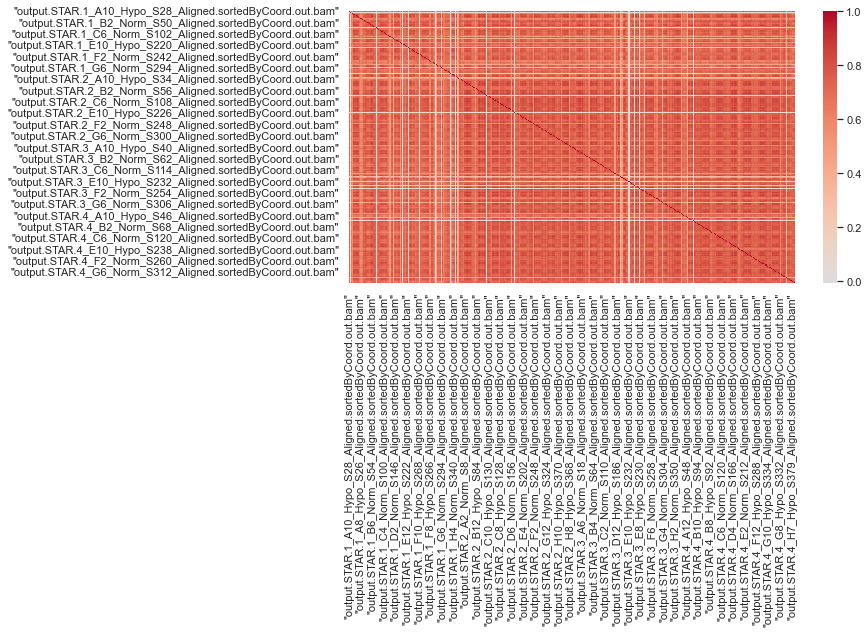%0A)

In \[48\]:

    # You can also visualized using plots
    # sns.pairplot(df_small)

You could look at the distribution of the correlation between gene
expression profiles using Histogram

In \[49\]:

    np.shape(c)
    type(c)
    c.head(3)
    c_small=c.iloc[:,:3]
    sns.histplot(c_small,bins=100)
    plt.ylabel('Frequency')
    plt.xlabel('Correlation between cells expression profiles')

Out\[49\]:

    Text(0.5, 0, 'Correlation between cells expression profiles')

![](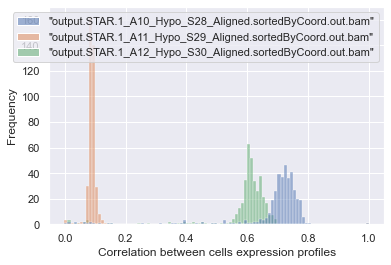%0A)

We expect the correlation between the gene expression profiles of the
the single cells to be fairly high.

Some genes will be characteristic of some cells. For example in our case
we expect some genes to be expressed at high levels only in cells
cultured in conditions of low oxygen (hypoxia), or viceversa. However,
most of the low and/or high expressed genes will tend to be generally
similar. Several genes will have a high expression across cells as they
are house keeping genes needed for the basic functioning of the cell.
Some genes will have low expression across cells as they are less or not
essential for the normal functioning, so they will have low or no
expression across cells and will only be expressed in specific
circumstances.

Are there some cells which are not correlated with the others? Can you
explore the distributions of gene expression for these cells and check
why? Do they have more zero values than other cells? Or do they have
higher values?

Next you could explore the features/genes. Are they correlated? Is this
expected? Could this generate issues in the ML?

Repeat the steps above for all datasets, and discuss the findings.

From now on we will proceed with the **pre-processed, filtered and
normalized, data**. We will use the data file with name "....3000...".
These are not only data which have been filtered and processed to
address the issues discussed in the EDA, but I have also selected the
3000 **most variable** features. This is a first arbitrary threshold to
focus on the most informative features for the purpose of this analysis.
However, there are many other methods to reduce dimensionality. Can you
suggest and discuss other approaches?

------------------------------------------------------------------------

------------------------------------------------------------------------

### Unsupervised Learning<a href="#Unsupervised-Learning" class="anchor-link">¶</a>

Please use the "...Train.txt" dataset. I have kept some data on the side
for you to test you results at the end.

I know you have been introduced to PCA and clustering libraries, so
please use them as you wish to explore these data further.

What can these methods tell us? Please discuss the results and justify
your choices.

------------------------------------------------------------------------

------------------------------------------------------------------------

### Supervised Learning<a href="#Supervised-Learning" class="anchor-link">¶</a>

We have discussed in class that the way a cell responds to low oxygen
conditions (hypoxia) is a relevant phenotype for several diseases, and
in particular for cancer. Hypoxia is one of the key physiological
differences between cancer and normal tissues. Exposure to hypoxia
selects for cancer cells with an aggressive phenotypes. Cells under
hypoxia are resistant to many different treatments, and they are likely
to metastatize to distant sites. Our general aim is to learn a
classifier which allow us to predict if a cell is being exposed to low
oxygen (hypoxia).

The possible steps you might want to carry out are:

-   The first task could be to develop a classifier in each cell type
    using one or more ML appraoches.
-   You could start from the data or from the reduced data. Please
    justify your choices.
-   Could you apply some feature selection? How will you apply it?
-   You could compare the performance of the different classifiers
    learnt with different methods, and discuss your findings.
-   You coud compare the classifiers between cell types. Is the
    performance similar?
-   Are the features retained by the classifiers in common between cell
    types?
-   You could test the classifier as predictor in a cell type where it
    was not developed. Does it predict well?
-   Could you develop a general classifier, independent of cell type?
-   You could test the predictivity of the classifier when you use it in
    data gathered with different technologies. How does it perform? Why?
    Are some ML methods better at this? Could you develop a technique

Present and discuss your results.

The ultimate task will be to predict the correct labels (hypoxia or
normoxia) in the test set. You will be given the test set as last step,
and you will need to include the predicted labels in a separate file, in
the form of a table/tab delimited file, which I will check against the
real labels after you have handed in your reports.

Send the reports to me and I will share with the rest of the course
instructors for evaluation.